# Capstone Project

Analyzing Crime Occurance in Los Angeles From 2010 to Present 


In [1]:
import pandas as pd 
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import rc 
from datetime import datetime as dt 
from matplotlib.font_manager import FontProperties
import seaborn as sns 
import numpy as np
from mapsplotlib import mapsplot as mplt
%matplotlib inline 

In [2]:
# Setting a seaborn style for all graphs 
sns.set()

In [3]:
# Loading the data 
df=pd.read_csv('/Users/dasha/Downloads/Crime_Data_from_2010_to_Present.csv',parse_dates=[['Date Occurred','Time Occurred']])

In [4]:
# Checking the types of variables 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1805537 entries, 0 to 1805536
Data columns (total 25 columns):
Date Occurred_Time Occurred    datetime64[ns]
DR Number                      int64
Date Reported                  object
Area ID                        int64
Area Name                      object
Reporting District             int64
Crime Code                     int64
Crime Code Description         object
MO Codes                       object
Victim Age                     float64
Victim Sex                     object
Victim Descent                 object
Premise Code                   float64
Premise Description            object
Weapon Used Code               float64
Weapon Description             object
Status Code                    object
Status Description             object
Crime Code 1                   float64
Crime Code 2                   float64
Crime Code 3                   float64
Crime Code 4                   float64
Address                        object
Cr

In [5]:
# Dropping unnecessary columns 
df=df.drop(columns=['DR Number','Date Reported','Reporting District','MO Codes','Crime Code','Area ID','Premise Code','Weapon Used Code','Status Code','Crime Code 1','Crime Code 2','Crime Code 3','Crime Code 4','Address','Cross Street'])

In [6]:
# Splitting datatime object into separate date and time columns (For efficient use later...)
df['Date Occurred']=df['Date Occurred_Time Occurred'].dt.date
df['Time Occurred']=df['Date Occurred_Time Occurred'].dt.time
df['Hour']=df['Date Occurred_Time Occurred'].dt.hour
df['Minute']=df['Date Occurred_Time Occurred'].dt.minute
df['Hour_sin'] = np.sin(df.Hour*2.*np.pi/24)
df['Hour_cos'] = np.cos(df.Hour*2.*np.pi/24)
df['Min_sin'] = np.sin(df.Minute*2.*np.pi/60*24)
df['Min_cos'] = np.cos(df.Minute*2.*np.pi/60*24)

In [7]:
# Building a time classifier column 

morning_start=pd.to_datetime('06:00:00').time()
morning_end=pd.to_datetime('12:00:00').time()
afternoon_end=pd.to_datetime('17:00:00').time()
evening_end=pd.to_datetime('22:00:00').time()

def time_categorizer(time_str):
    if (time_str>morning_start) & (time_str<=morning_end):
        return "Morning"
    elif (time_str>morning_end) & (time_str<=afternoon_end):
        return 'Afternoon'
    elif (time_str>afternoon_end) & (time_str<=evening_end):
        return 'Evening'
    else: 
        return 'Night'

df['Time Code']=df['Time Occurred'].apply(time_categorizer)

In [8]:
# Looking at missing values
num_row=df.shape[0]
print(num_row)
vic_age=df['Victim Age'].isna().sum()
vic_sex=df['Victim Sex'].isna().sum()
vic_des=df['Victim Descent'].isna().sum()
vic_total=vic_age+vic_sex+vic_des
vic_total

1805537


476297

In [9]:
print('Victim Age Null = ',num_row/vic_age)
print('Victim Sex Null = ',num_row/vic_sex)
print('Victim Descent Null = ',num_row/vic_des)
#NaN values in Victim Age are 1/12th of the total data 
#NaN values in Victim Sex are 1/10th of the total data 
#NaN values in Victim Descent are 1/10th of the total data 
#NaN of 3 groups comprise approx. 1/4 of total data - will keep the NaN values since 
#some of that data will be useful for other calculations 

Victim Age Null =  12.569263541876962
Victim Sex Null =  10.856781215237065
Victim Descent Null =  10.854170549159878


In [10]:
df['Victim Age'].fillna('Missing',inplace=True)
df['Victim Sex'].fillna('Missing',inplace=True)
df['Victim Descent'].fillna('Missing',inplace=True)

In [11]:
# Looking at labels in 'Weapon Description' column 
df['Weapon Description'].value_counts()

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    365301
VERBAL THREAT                                      49983
UNKNOWN WEAPON/OTHER WEAPON                        47627
HAND GUN                                           28882
SEMI-AUTOMATIC PISTOL                              11332
KNIFE WITH BLADE 6INCHES OR LESS                   10783
OTHER KNIFE                                         7986
UNKNOWN FIREARM                                     6742
VEHICLE                                             6163
REVOLVER                                            5061
BOTTLE                                              4309
STICK                                               3772
ROCK/THROWN OBJECT                                  3771
BLUNT INSTRUMENT                                    3740
CLUB/BAT                                            3660
FOLDING KNIFE                                       3576
KITCHEN KNIFE                                       3220
MACE/PEPPER SPRAY              

In [12]:
# How much data is missing in 'Weapoin Description'
(df['Weapon Description'].isna().sum())/num_row*100

66.70491936747905

In [13]:
# Since the column is missing more than 66% of its data....
df.drop(columns='Weapon Description',inplace=True)

In [14]:
# Now 'Premise Description'...
df['Premise Description'].unique()

array(['MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)', 'STREET',
       'SINGLE FAMILY DWELLING', 'PARKING LOT', 'OTHER BUSINESS',
       'DEPARTMENT STORE', 'SIDEWALK', 'OTHER STORE',
       'NIGHT CLUB (OPEN EVENINGS ONLY)', 'HOSPITAL', 'POST OFFICE',
       'VEHICLE, PASSENGER/TRUCK', 'MARKET', 'JEWELRY STORE',
       'RESTAURANT/FAST FOOD', 'OTHER PREMISE', 'THEATRE/MOVIE',
       'OTHER RESIDENCE', 'PROJECT/TENEMENT/PUBLIC HOUSING',
       'BAR/COCKTAIL/NIGHTCLUB', 'MEDICAL/DENTAL OFFICES', 'VACANT LOT',
       'DRIVEWAY', 'POLICE FACILITY', 'FREEWAY', 'HOTEL',
       'CLOTHING STORE', 'DRUG STORE', 'PARK/PLAYGROUND',
       'CELL PHONE STORE', 'HEALTH SPA/GYM', 'OTHER/OUTSIDE',
       'HARDWARE/BUILDING SUPPLY', 'ALLEY', 'TOBACCO SHOP', 'BUS STOP',
       'SWAP MEET', 'MINI-MART', 'STORAGE SHED', 'GARAGE/CARPORT',
       'HIGH SCHOOL', 'PUBLIC STORAGE', 'PARKING UNDERGROUND/BUILDING',
       'OFFICE BUILDING/OFFICE', 'WAREHOUSE', 'SKATING RINK*',
       'CONVENTION CENTER', 'BANK

In [15]:
(df['Premise Description'].isna().sum())/num_row*100

0.17933722765027799

In [16]:
# Premise Description data is well populated and could be used in calculations 
# Will drop NaN values since number of missing data is insignificant 

In [17]:
df.dropna(subset=['Premise Description'],how='any',inplace=True)

In [18]:
# Building a broad, but more narrow classification of crime labels than in the original dataframe ....

Crime={'Motor Vehicle and Transportation-Related Crime':['RECKLESS DRIVING',
                                                'DRIVING WITHOUT OWNER CONSENT (DWOC)',
                                                  'FAILURE TO YIELD','TRAIN WRECKING'],
    'Sex-Related Crime':['INTIMATE PARTNER - SIMPLE ASSAULT',
                            'INTIMATE PARTNER - AGGRAVATED ASSAULT',
                            'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH 0007=02',
                            'INDECENT EXPOSURE',
                            'RAPE, FORCIBLE',
                            'SEXUAL PENTRATION WITH A FOREIGN OBJECT',
                            'LETTERS, LEWD',
                            'RAPE, ATTEMPTED',
                            'LEWD CONDUCT',
                            'BATTERY WITH SEXUAL CONTACT',
                            'PIMPING',
                            'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM0065',
                            'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM',
                            'PEEPING TOM',
                            'SEX, UNLAWFUL',
                            'ORAL COPULATION',
                            'PANDERING',
                            'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)',
                            'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ0059',
                            'SEXUAL PENETRATION W/FOREIGN OBJECT',
                            'LEWD/LASCIVIOUS ACTS WITH CHILD',
                            'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ',
                            'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
                            'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH','BIGAMY'],
    'Human Trafficking':['HUMAN TRAFFICKING - COMMERCIAL SEX ACTS',
                            'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE'],
    'Vandalism and Property Damage':['VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
                                        'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
                                        'TELEPHONE PROPERTY - DAMAGE',
                                        'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114'],
    'Kidnapping':['KIDNAPPING',
                     'CHILD STEALING',
                     'KIDNAPPING - GRAND ATTEMPT'],
    'Criminal Threats':['CRIMINAL THREATS - NO WEAPON DISPLAYED',
                           'STALKING','BOMB SCARE','BRANDISH WEAPON',
                           'THREATENING PHONE CALLS/LETTERS'],
    'Homocide':['CRIMINAL HOMICIDE',
                   'LYNCHING - ATTEMPTED',
                   'LYNCHING',
                   'MANSLAUGHTER, NEGLIGENT'],
    'Robbery and Theft':['THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
                            'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
                            'THEFT PLAIN - PETTY ($950 & UNDER)',
                            'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
                            'BIKE - STOLEN',
                            'ROBBERY',
                            'ATTEMPTED ROBBERY',
                            'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036',
                            'BURGLARY FROM VEHICLE',
                            'BURGLARY','SHOPLIFTING-GRAND THEFT ($950.01 & OVER)',
                            'THEFT, PERSON',
                            'EXTORTION',
                            'BURGLARY FROM VEHICLE, ATTEMPTED',
                            'THEFT PLAIN - ATTEMPT',
                            'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
                            'BURGLARY, ATTEMPTED',
                            'THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)',
                            'THEFT OF IDENTITY',
                            'BUNCO, GRAND THEFT',
                            'PURSE SNATCHING',
                            'PROWLER',
                            'VEHICLE - ATTEMPT STOLEN',
                            'BIKE - ATTEMPTED STOLEN',
                            'THEFT FROM PERSON - ATTEMPT',
                            'PICKPOCKET',
                            'VEHICLE - STOLEN','DISHONEST EMPLOYEE - PETTY THEFT',
                            'BUNCO, ATTEMPT',
                            'BUNCO, PETTY THEFT',
                            'SHOPLIFTING - ATTEMPT',
                            'PICKPOCKET, ATTEMPT',
                            'PURSE SNATCHING - ATTEMPT',
                            'THEFT FROM MOTOR VEHICLE - ATTEMPT',
                            'DISHONEST EMPLOYEE - GRAND THEFT',
                            'THEFT, COIN MACHINE - PETTY ($950 & UNDER)',
                            'BOAT - STOLEN','TILL TAP - PETTY ($950 & UNDER)',
                            'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)',
                            'GRAND THEFT / AUTO REPAIR',
                            'PETTY THEFT - AUTO REPAIR',
                            'TILL TAP - ATTEMPT',
                            'TILL TAP - GRAND THEFT ($950.01 & OVER)',
                            'DRUNK ROLL - ATTEMPT','THEFT, COIN MACHINE - ATTEMPT',
                            'DISHONEST EMPLOYEE ATTEMPTED THEFT','DRUNK ROLL','EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)'],
    'Fraud and Bribery':['COUNTERFEIT','DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER',
                         'CREDIT CARDS, FRAUD USE ($950.01 & OVER)',
                         'CREDIT CARDS, FRAUD USE ($950 & UNDER',
                         'DOCUMENT WORTHLESS ($200.01 & OVER)',
                         'BRIBERY',
                         'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $400',
                         'GRAND THEFT / INSURANCE FRAUD','DOCUMENT WORTHLESS ($200 & UNDER)',
                         'DOCUMENT FORGERY / STOLEN FELONY'],
    'Assault':['BATTERY - SIMPLE ASSAULT',
               'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
               'OTHER ASSAULT',
               'INTIMATE PARTNER - AGGRAVATED ASSAULT',
               'SHOTS FIRED AT INHABITED DWELLING',
               'BATTERY POLICE (SIMPLE)',
               'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',
               'BATTERY ON A FIREFIGHTER',
               'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT',
               'THROWING OBJECT AT MOVING VEHICLE','DISCHARGE FIREARMS/SHOTS FIRED'],
    'Violation of Orders or Resisting Arrest':['RESISTING ARREST',
                                               'VIOLATION OF COURT ORDER',
                                               'VIOLATION OF RESTRAINING ORDER',
                                               'VIOLATION OF TEMPORARY RESTRAINING ORDER',
                                               'FIREARMS RESTRAINING ORDER (FIREARMS RO)',
                                               'CONTEMPT OF COURT'],
    'Other':['OTHER MISCELLANEOUS CRIME',
             'DISTURBING THE PEACE',
             'CRUELTY TO ANIMALS',
            'UNAUTHORIZED COMPUTER ACCESS',
             'ILLEGAL DUMPING',
             'FALSE POLICE REPORT',
             'CONTRIBUTING',
             'DISRUPT SCHOOL',
             'BLOCKING DOOR INDUCTION CENTER',
             'TRESPASSING',
             'nan',
             'FALSE IMPRISONMENT',
             'CONSPIRACY',
            'ABORTION/ILLEGAL',
            'ARSON'], 
    'Weapon possession/Bombing':['WEAPONS POSSESSION/BOMBING'],
    'Riots and Disruption of Peace':['INCITING A RIOT', 
                                        'FAILURE TO DISPERSE'],
    'Child-Related Crime':['CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
                           'CHILD NEGLECT (SEE 300 W.I.C.)',
                           'CHILD ANNOYING (17YRS & UNDER)',
                           'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)0060',
                           'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',
                           'CHILD ABANDONMENT','CHILD PORNOGRAPHY',
                           'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)'],
    'Unlawful Sales':['DRUGS, TO A MINOR','REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)0132',
                      'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)']}

In [19]:
# Building a even more narrow classification for crime labels (compared to above)...

crime_detailed={'Reckless Driving':['RECKLESS DRIVING',
                                    'FAILURE TO YIELD',
                                    'TRAIN WRECKING'],
                'Driving Without Owner Consent':['DRIVING WITHOUT OWNER CONSENT (DWOC)'],
                'Rape and Sexual Assault/Battery':['INTIMATE PARTNER - SIMPLE ASSAULT',
                                                   'INTIMATE PARTNER - AGGRAVATED ASSAULT',
                                                   'BATTERY WITH SEXUAL CONTACT',
                                                   'RAPE, ATTEMPTED',
                                                   'RAPE, FORCIBLE'],
                'Sodomy':['SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH 0007=02',
                          'ORAL COPULATION',
                          'SEXUAL PENTRATION WITH A FOREIGN OBJECT',
                          'SEXUAL PENETRATION W/FOREIGN OBJECT',
                          'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH'],
                'Indecency/Lewd Conduct':['INDECENT EXPOSURE',
                                          'LETTERS, LEWD',
                                          'LEWD CONDUCT',
                                          'PEEPING TOM',
                                          'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD'],
                'Prostitution':['PIMPING'],
                'Unlawful Sex':['SEX, UNLAWFUL',
                                'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ0059',
                                'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ'],
                'Other Sexual Crime':['BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM0065',
                                      'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM',
                                      'PANDERING',
                                      'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)','BIGAMY'], 
                'Human Trafficking':['HUMAN TRAFFICKING - COMMERCIAL SEX ACTS',
                                     'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE'],
                'Vandalism and Property Damage':['VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
                                                 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
                                                 'TELEPHONE PROPERTY - DAMAGE',
                                                 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114'],
                'Kidnapping':['KIDNAPPING',
                              'CHILD STEALING',
                              'KIDNAPPING - GRAND ATTEMPT'],
                'Criminal Threats w/o Weapon':['CRIMINAL THREATS - NO WEAPON DISPLAYED'],
                'Criminal Threats w/Weapon':['BRANDISH WEAPON'],
                'Harassment':['STALKING',
                              'THREATENING PHONE CALLS/LETTERS'],
                'Homocide':['CRIMINAL HOMICIDE',
                            'LYNCHING - ATTEMPTED',
                            'LYNCHING',
                            'MANSLAUGHTER, NEGLIGENT'],
                'Theft From a Person':['THEFT, PERSON','THEFT FROM PERSON - ATTEMPT'],
                'Shoplifting':['SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
                               'SHOPLIFTING - ATTEMPT',
                               'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)'],
                'Theft/Burglary From a Vehicle':['THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)',
                                                 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
                                                 'THEFT FROM MOTOR VEHICLE - ATTEMPT',
                                                 'BURGLARY FROM VEHICLE',
                                                 'BURGLARY FROM VEHICLE, ATTEMPTED'],
                'Petty Theft':['THEFT PLAIN - PETTY ($950 & UNDER)',
                                       'THEFT PLAIN - ATTEMPT',
                                       'THEFT, COIN MACHINE - PETTY ($950 & UNDER)',
                                       'PETTY THEFT - AUTO REPAIR',
                                       'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)',
                                       'DISHONEST EMPLOYEE ATTEMPTED THEFT',
                                       'THEFT, COIN MACHINE - ATTEMPT',
                                       'TILL TAP - ATTEMPT',
                                       'DISHONEST EMPLOYEE - PETTY THEFT',
                                       'TILL TAP - PETTY ($950 & UNDER)',
                                       'BUNCO, PETTY THEFT',
                                       'BUNCO, ATTEMPT'],
                'Grand Theft':['THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
                                       'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
                                       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036',
                                       'TILL TAP - GRAND THEFT ($950.01 & OVER)',
                                       'BUNCO, GRAND THEFT',
                                       'DISHONEST EMPLOYEE - GRAND THEFT',
                                       'GRAND THEFT / AUTO REPAIR',
                                       'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)'],
                'Vehicle/Transportation Theft':['BIKE - STOLEN',
                                                'VEHICLE - STOLEN',
                                                'BOAT - STOLEN',
                                                'BIKE - ATTEMPTED STOLEN',
                                                'VEHICLE - ATTEMPT STOLEN'],
                'Robbery':['ROBBERY','ATTEMPTED ROBBERY'],
                'Burglary':['BURGLARY, ATTEMPTED','BURGLARY'],
                'Pickpocketing/Purse Snatching': ['PICKPOCKET',
                                                  'PICKPOCKET, ATTEMPT',
                                                  'PURSE SNATCHING - ATTEMPT',
                                                  'PURSE SNATCHING',
                                                  'DRUNK ROLL - ATTEMPT',
                                                  'DRUNK ROLL'],
                'Other Theft':['EXTORTION',
                               'PROWLER'],
                'Fraud':['DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER',
                                 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $400',
                                 'GRAND THEFT / INSURANCE FRAUD',
                                 'CREDIT CARDS, FRAUD USE ($950.01 & OVER)',
                                 'CREDIT CARDS, FRAUD USE ($950 & UNDER',
                                 'BRIBERY'],
                'Identity Theft': ['THEFT OF IDENTITY'],
                'Forgery and Counterfeit':['COUNTERFEIT',
                                           'DOCUMENT WORTHLESS ($200.01 & OVER)',
                                           'DOCUMENT WORTHLESS ($200 & UNDER)',
                                           'DOCUMENT FORGERY / STOLEN FELONY'],
                'Battery and Simple Assault':['BATTERY - SIMPLE ASSAULT',
                                              'BATTERY POLICE (SIMPLE)',
                                              'BATTERY ON A FIREFIGHTER',
                                              'THROWING OBJECT AT MOVING VEHICLE'],
                'Other Assault':['OTHER ASSAULT'],
                'Assault w/Deadly Weapon':['ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
                                           'SHOTS FIRED AT INHABITED DWELLING',
                                           'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',
                                           'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT',
                                           'DISCHARGE FIREARMS/SHOTS FIRED'],
                'Violation of Court Orders/Resisting Arrest':['RESISTING ARREST',
                                                              'VIOLATION OF COURT ORDER',
                                                              'VIOLATION OF RESTRAINING ORDER',
                                                              'VIOLATION OF TEMPORARY RESTRAINING ORDER',
                                                              'FIREARMS RESTRAINING ORDER (FIREARMS RO)',
                                                              'CONTEMPT OF COURT'],
                'Trespassing':['TRESPASSING'],
                'Other':['OTHER MISCELLANEOUS CRIME',
                         'CRUELTY TO ANIMALS','UNAUTHORIZED COMPUTER ACCESS','ILLEGAL DUMPING','FALSE POLICE REPORT',
                         'CONTRIBUTING',
                         'DISRUPT SCHOOL',
                         'FALSE IMPRISONMENT',
                         'BLOCKING DOOR INDUCTION CENTER',
                         'nan',
                         'ARSON',
                         'CONSPIRACY',
                         'ABORTION/ILLEGAL'],
                'Riots and Disruption of Peace':['DISTURBING THE PEACE',
                                                 'FAILURE TO DISPERSE',
                                                 'INCITING A RIOT'],
                'Weapon possession/Bombing':['WEAPONS POSSESSION/BOMBING',
                                             'BOMB SCARE'],
                'Physical Child Abuse': ['CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
                                         'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT'], 
                'Child Neglect and Abandonment':['CHILD NEGLECT (SEE 300 W.I.C.)',
                                                 'CHILD ABANDONMENT'],
                'Child Sexual Abuse':['CHILD PORNOGRAPHY',
                                      'LEWD/LASCIVIOUS ACTS WITH CHILD'],
                'Other Child Abuse':['CHILD ANNOYING (17YRS & UNDER)',
                                     'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)0060',
                                     'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)'],
                'Unlawful Sales of Drugs and Weapons':['DRUGS, TO A MINOR',
                                                       'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)0132',
                                                       'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)']}

In [20]:
# Reverse the dictionary to idetify each crime as a subset of crimes 

reverse_crime={val: key for key in Crime for val in Crime[key]}

In [21]:
# same as above for the more narrow dictionary 

reverse_detailed_crime={val: key for key in crime_detailed for val in crime_detailed[key]}

In [22]:
df['Crime Code Description']=df['Crime Code Description'].astype('str')

In [23]:
# Creating a new column with broad dictionary 

df['Crime']=df['Crime Code Description'].map(reverse_crime)

In [24]:
# Creating a new column with narrow dictionary 

df['Crime_Detailed']=df['Crime Code Description'].map(reverse_detailed_crime)

In [25]:
# Replace a difficult name in 'Premise Description'

df['Premise Description']=df['Premise Description'].replace({'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)':'MULTI-UNIT DWELLING'})

In [26]:
# Asserting if 'Crime' column does not contain any NaNs 

df['Crime'].notnull().all().all()

True

In [27]:
# Asserting if the whole data frame does not contain any NaNs 
df.notnull().all().all()

True

In [28]:
df.head()

Date Occurred_Time Occurred    Area Name  \
0         2013-03-11 18:00:00  77th Street   
1         2010-01-22 23:00:00      Olympic   
2         2013-03-18 20:30:00    Southeast   
3         2010-11-10 18:00:00    Southeast   
4         2014-01-04 23:00:00      Topanga   

                     Crime Code Description Victim Age Victim Sex  \
0         INTIMATE PARTNER - SIMPLE ASSAULT         30          F   
1                          VEHICLE - STOLEN    Missing    Missing   
2                          VEHICLE - STOLEN         12    Missing   
3                          VEHICLE - STOLEN    Missing    Missing   
4  VANDALISM - MISDEAMEANOR ($399 OR UNDER)         84          M   

  Victim Descent     Premise Description Status Description  \
0              W     MULTI-UNIT DWELLING        Adult Other   
1        Missing                  STREET        Invest Cont   
2        Missing                  STREET        Invest Cont   
3        Missing                  STREET        Invest Cont   
4              W  SINGLE FAMILY DWELLING        Invest Cont   

              Location  Date Occurred Time Occurred  Hour  Minute  Hour_sin  \
0  (33.9829, -118.3338)    2013-03-11      18:00:00    18       0 -1.000000   
1  (34.0454, -118.3157)    2010-01-22      23:00:00    23       0 -0.258819   
2   (33.942, -118.2717)    2013-03-18      20:30:00    20      30 -0.866025   
3  (33.9572, -118.2717)    2010-11-10      18:00:00    18       0 -1.000000   
4  (34.2009, -118.6369)    2014-01-04      23:00:00    23       0 -0.258819   

       Hour_cos       Min_sin  Min_cos Time Code  \
0 -1.836970e-16  0.000000e+00      1.0   Evening   
1  9.659258e-01  0.000000e+00      1.0     Night   
2  5.000000e-01 -1.715001e-14      1.0   Evening   
3 -1.836970e-16  0.000000e+00      1.0   Evening   
4  9.659258e-01  0.000000e+00      1.0     Night   

                           Crime                   Crime_Detailed  
0              Sex-Related Crime  Rape and Sexual Assault/Battery  
1              Robbery and Theft     Vehicle/Transportation Theft  
2              Robbery and Theft     Vehicle/Transportation Theft  
3              Robbery and Theft     Vehicle/Transportation Theft  
4  Vandalism and Property Damage    Vandalism and Property Damage

In [29]:
timed_data=df.loc[:,['Date Occurred_Time Occurred','Area Name','Crime']]
timed_data['Year']=timed_data['Date Occurred_Time Occurred'].dt.year

In [30]:
#Yearly data....

In [31]:
yearly_data=timed_data.drop(columns='Date Occurred_Time Occurred')
yearly_data=yearly_data[yearly_data['Year']!=2018]
yearly_data=yearly_data.groupby(['Year','Area Name']).count()

In [32]:
yearly_data['Crime Count']=yearly_data['Crime']
yearly_data=yearly_data.drop(columns='Crime')

In [33]:
yearly_data=yearly_data.unstack(level='Area Name')

Text(0.5,1,'LA Crime Rate by District')

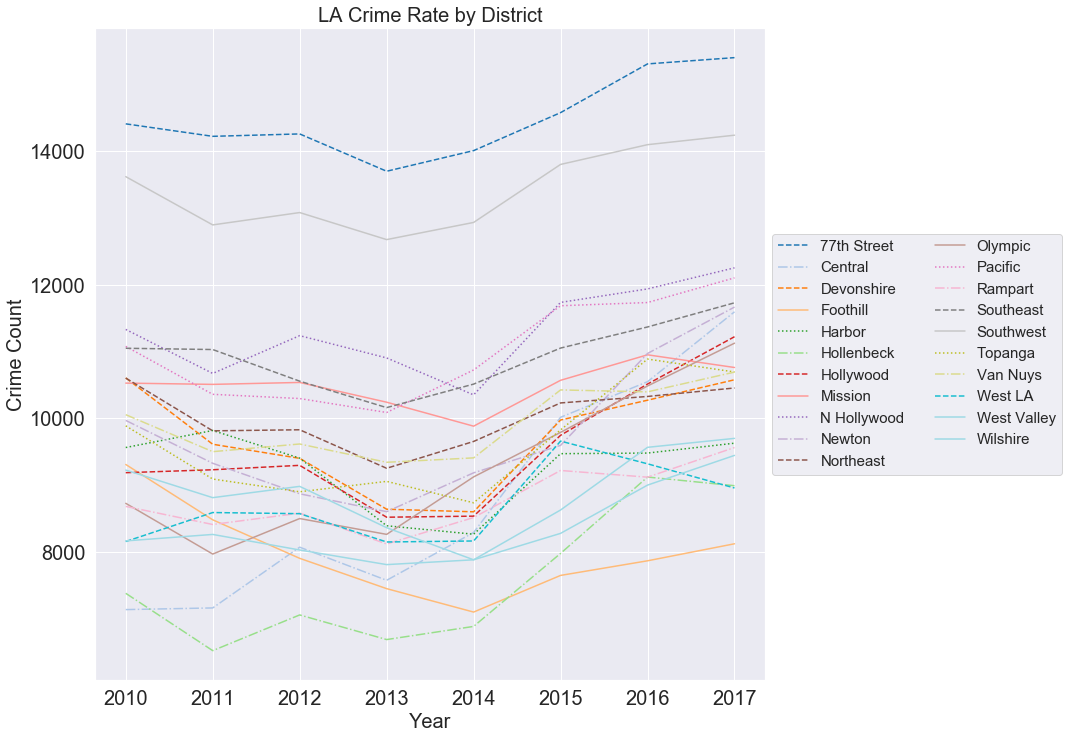

In [34]:
plot=yearly_data['Crime Count'].plot(by='Area Name',style=['--','-.','--','-',':','-.','--','-',':','-.','--','-',':','-.','--','-',':','-.','--','-','-',':','-.','--'],colormap='tab20',figsize=(12,12))
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15}, ncol=2,facecolor='inherit')
plt.ylabel('Crime Count',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('LA Crime Rate by District',fontsize=20)


In [35]:
# Seems that 77th Street and Southwest districts are the most dangerous 

In [36]:
#Hollenbeck was safest up until 2014
#Central area,Newton,Olympic crime has been rising rapidly since 2013 
#2014 seems to have the least amount of crime for areas in general 
#Foothill was able to bring down the crime significantly from 2010 to 2014 
# What happened in 2013 and 2014??? 

Text(0.5,1,'Regions With Increasing and Decreasing Crime')

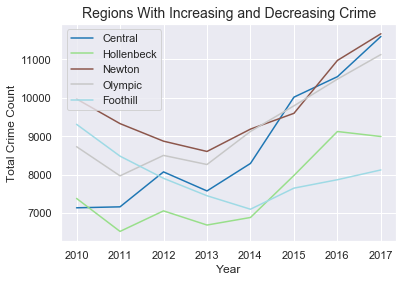

In [37]:
yearly_data['Crime Count'].plot(y=['Central','Hollenbeck','Newton','Olympic','Foothill'],colormap='tab20')
plt.legend(loc='upper left')
plt.xlabel('Year',fontsize=12)
plt.ylabel("Total Crime Count",fontsize=12)
plt.title('Regions With Increasing and Decreasing Crime',fontsize=14)

In [38]:
yearly_bycrime=timed_data.drop(columns='Date Occurred_Time Occurred')
yearly_bycrime=yearly_bycrime[yearly_bycrime['Year']!=2018]

In [39]:
yearly_bycrime=yearly_bycrime.groupby(['Year','Area Name','Crime']).size().to_frame(name='Count')

In [40]:
central_mostcommon=yearly_bycrime.loc[(slice(None),'Central'),:]
central_mostcommon=central_mostcommon.reset_index()
central_mostcommon=central_mostcommon.loc[:,['Year','Crime','Count']]
central_mostcommon.set_index(['Year','Crime'],inplace=True)
central_mostcommon=central_mostcommon.unstack(level='Crime',fill_value=0)

In [41]:
hollenbeck_mostcommon=yearly_bycrime.loc[(slice(None),'Hollenbeck'),:]
hollenbeck_mostcommon=hollenbeck_mostcommon.reset_index()
hollenbeck_mostcommon=hollenbeck_mostcommon.loc[:,['Year','Crime','Count']]
hollenbeck_mostcommon.set_index(['Year','Crime'],inplace=True)
hollenbeck_mostcommon=hollenbeck_mostcommon.unstack(level='Crime',fill_value=0)

In [42]:
newton_mostcommon=yearly_bycrime.loc[(slice(None),'Newton'),:]
newton_mostcommon=newton_mostcommon.reset_index()
newton_mostcommon=newton_mostcommon.loc[:,['Year','Crime','Count']]
newton_mostcommon.set_index(['Year','Crime'],inplace=True)
newton_mostcommon=newton_mostcommon.unstack(level='Crime',fill_value=0)

In [43]:
olympic_mostcommon=yearly_bycrime.loc[(slice(None),'Olympic'),:]
olympic_mostcommon=olympic_mostcommon.reset_index()
olympic_mostcommon=olympic_mostcommon.loc[:,['Year','Crime','Count']]
olympic_mostcommon.set_index(['Year','Crime'],inplace=True)
olympic_mostcommon=olympic_mostcommon.unstack(level='Crime',fill_value=0)

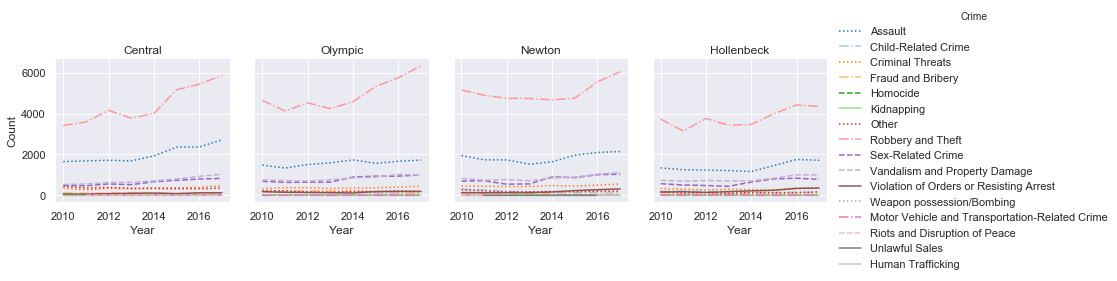

In [44]:
newdf=yearly_bycrime.reset_index()
newdf.set_index(['Area Name'],inplace=True)
newdf=newdf.loc[['Central','Olympic','Newton','Hollenbeck']]
newdf.reset_index(inplace=True)
g = sns.FacetGrid(newdf, col="Area Name", hue="Crime",palette='tab20',hue_kws={'ls':[':','-.',':','-.','--','-',':','-.','--','--','-',':','-.','--','-','-',':']})
g.map(plt.plot, "Year", "Count")
g.add_legend()
g.set_titles("{col_name}")

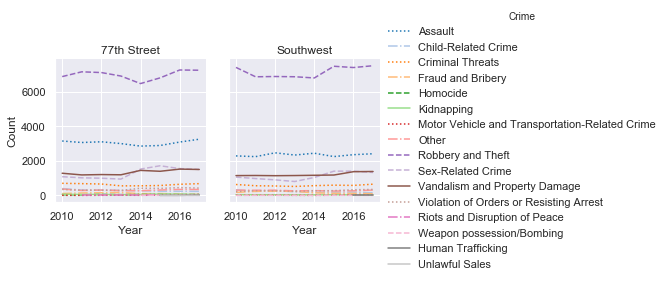

In [45]:
newdf=yearly_bycrime.reset_index()
newdf.set_index(['Area Name'],inplace=True)
high_crime=newdf.loc[['77th Street','Southwest']]
high_crime.reset_index(inplace=True)
g = sns.FacetGrid(high_crime, col="Area Name", hue="Crime",palette='tab20',hue_kws={'ls':[':','-.',':','-.','--','-',':','-.','--','--','-',':','-.','--','-','-',':']})
g.map(plt.plot, "Year", "Count")
g.add_legend()
g.set_titles("{col_name}")

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000., 450000.]), <a list of 10 Text yticklabel objects>)

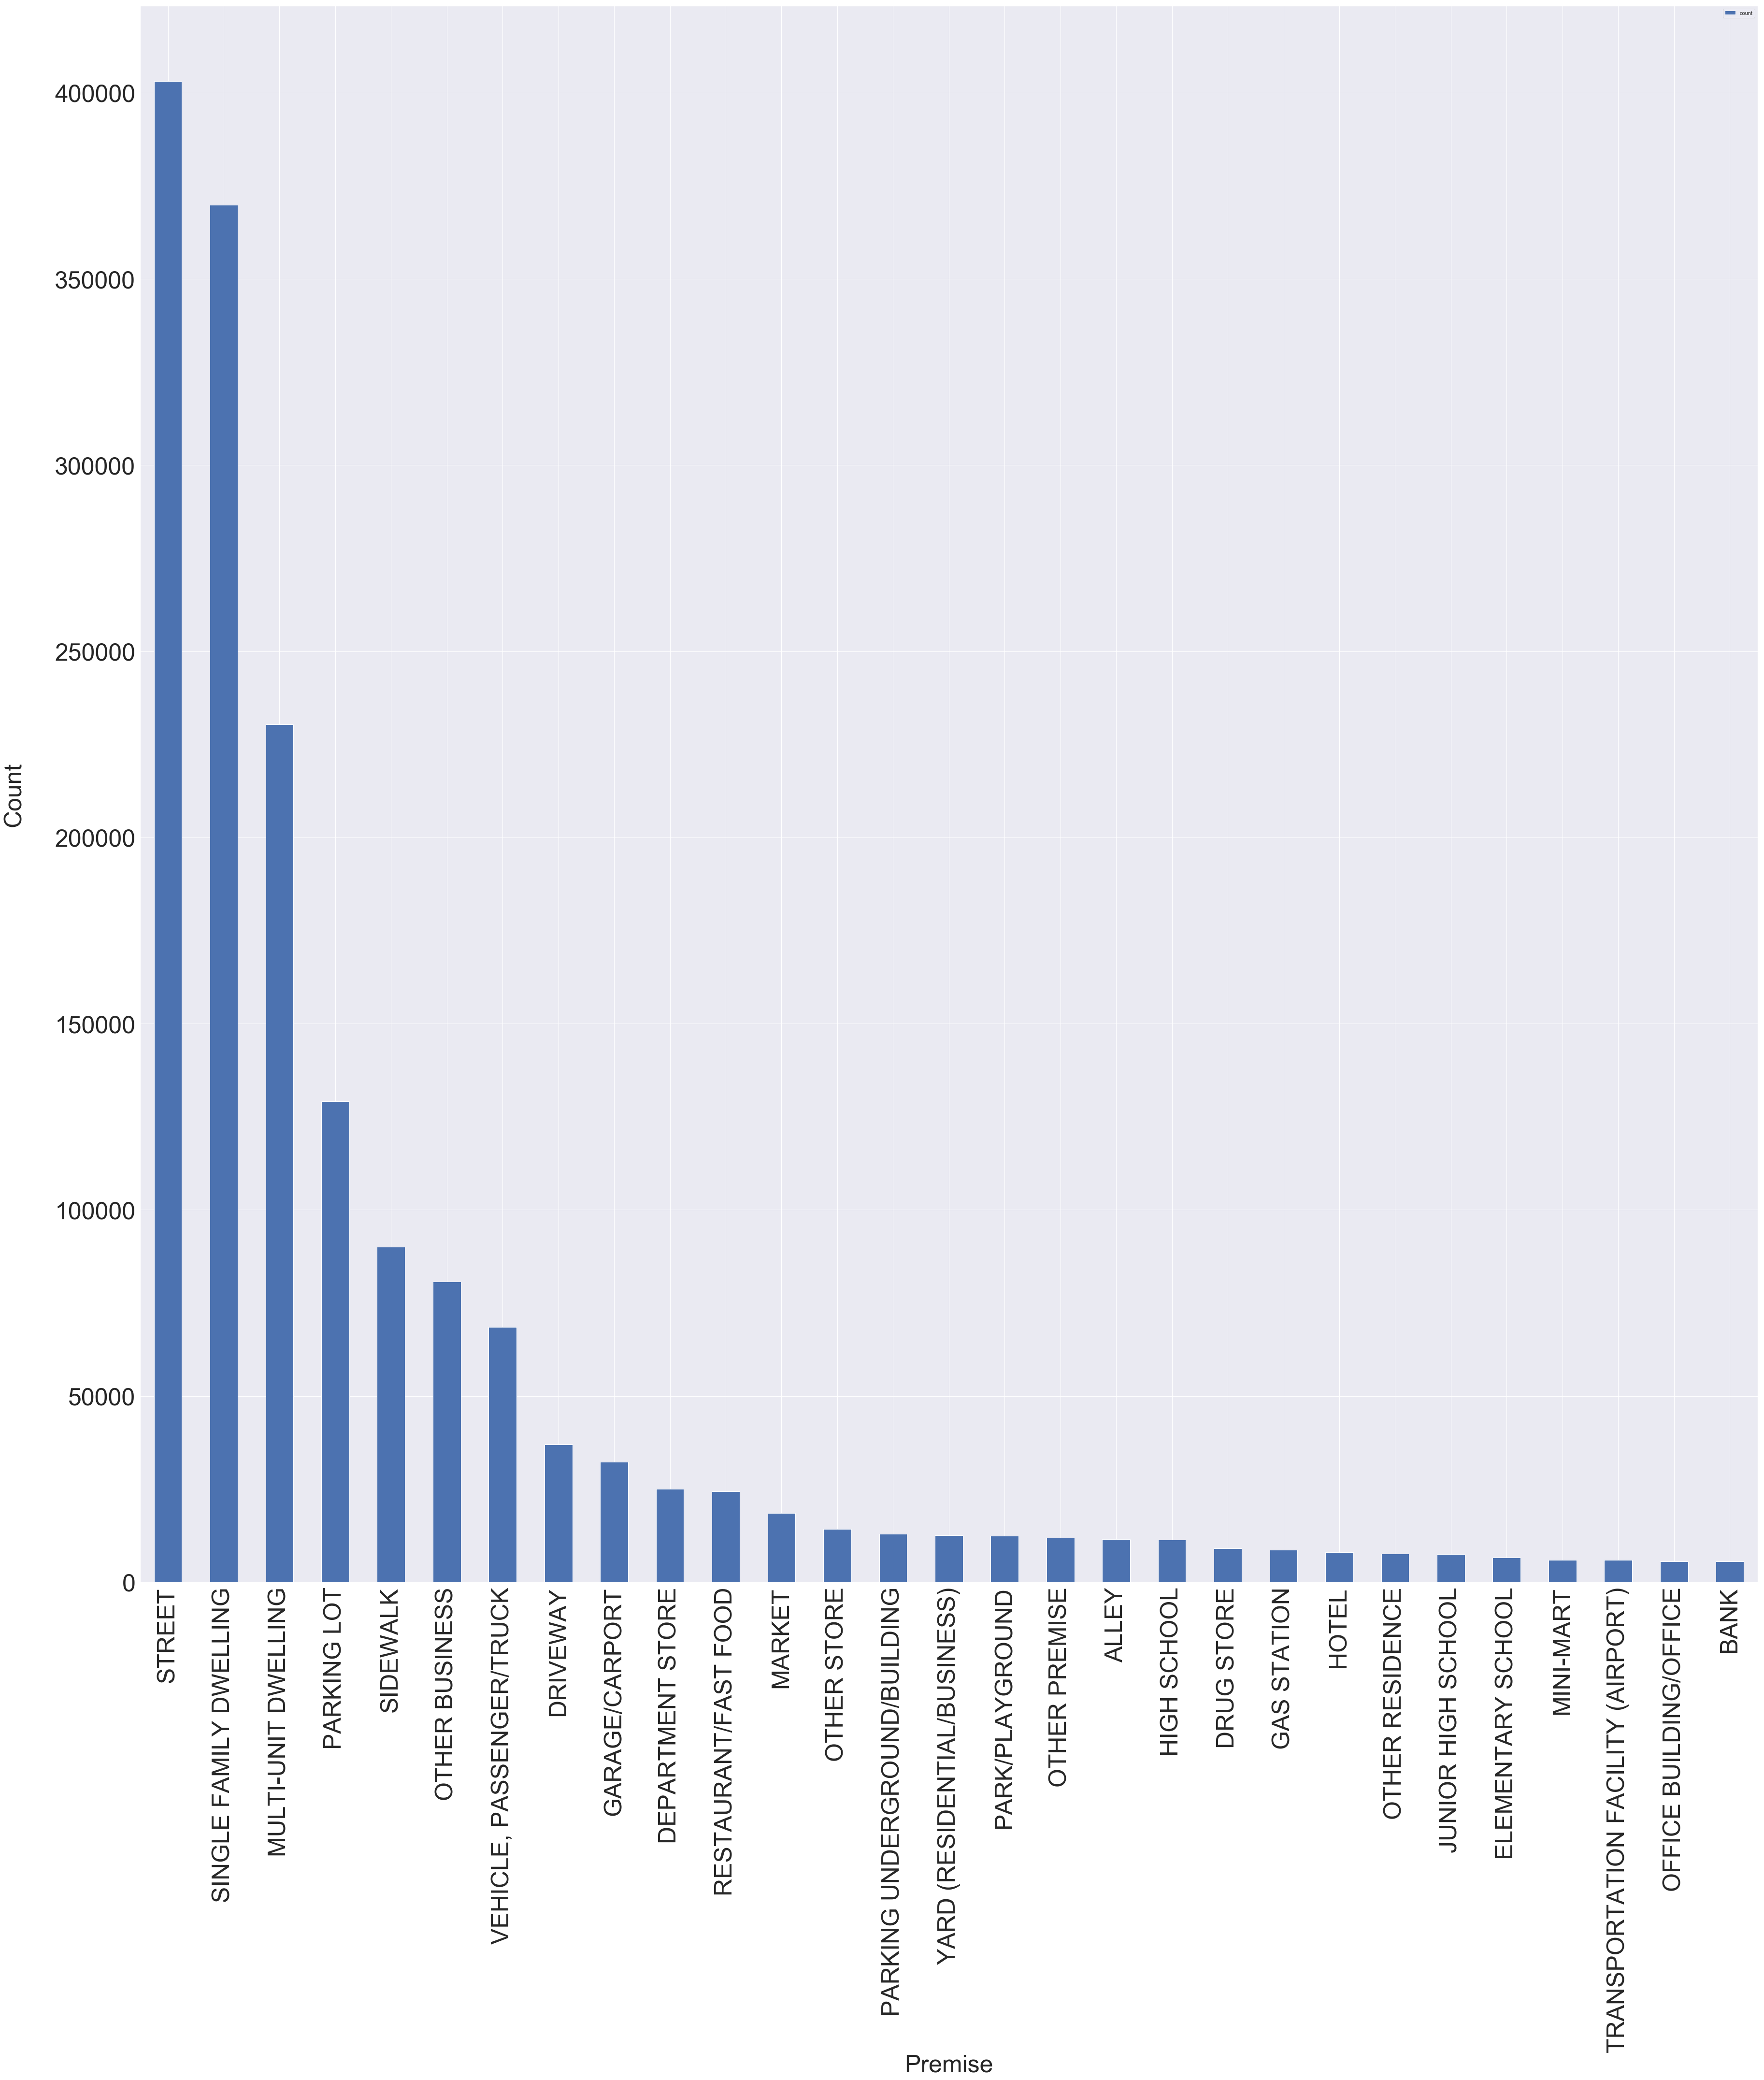

In [46]:
df_premise=df.loc[:,'Premise Description']
df_premise=df_premise.value_counts().to_frame('count')
df_premise=df_premise[df_premise['count']>5000]
df_premise.plot(kind='bar',figsize=(60,60))
plt.xlabel('Premise',fontsize=50)
plt.xticks(fontsize=50)
plt.ylabel('Count',fontsize=50,labelpad=60)
plt.yticks(fontsize=50)

In [47]:
theft_assault_info=df.loc[:,['Area Name','Crime','Premise Description']]
theft_assault_info.set_index('Area Name',inplace=True)
theft_assault_info=theft_assault_info.loc[['Central','Olympic','Newton','Hollenbeck']]
theft_assault_info=theft_assault_info.loc['Central']
theft_assault_info.reset_index(inplace=True)
theft_assault_info.reset_index(inplace=True)
theft_assault_info=theft_assault_info.groupby(['Crime','Area Name','Premise Description']).size().to_frame('Count') 
theft_assault_info.reset_index(inplace=True)
theft_assault_info.set_index('Area Name',inplace=True)
theft_assault_info=theft_assault_info.loc['Central']
theft_assault_info.reset_index(inplace=True)
theft_assault_info=theft_assault_info[theft_assault_info['Count']>0]
theft_assault_info.drop(columns='Area Name',inplace=True)
theft_assault_info.set_index(['Premise Description','Crime'],inplace=True)
theft_assault_info=theft_assault_info.unstack(level='Crime',fill_value=0)
premise=['STREET','SIDEWALK','MULTI-UNIT DWELLING','PARKING LOT','OTHER BUSINESS','DEPARTMENT STORE','OTHER STORE']
theft_assault_info=theft_assault_info['Count'].loc[premise].plot(kind='bar',stacked=True,colormap='tab20',figsize=(100,100)) 
plt.xticks(fontsize=120)
plt.yticks(fontsize=120)
plt.legend(loc='upper right',prop={'size':120})
plt.title('Central District',fontsize=200)
plt.xlabel('Premise',fontsize=200)
plt.tight_layout()

In [48]:
theft_assault_info=df.loc[:,['Area Name','Crime','Premise Description']]
theft_assault_info.set_index('Area Name',inplace=True)
theft_assault_info=theft_assault_info.loc[['Central','Olympic','Newton','Hollenbeck']]
theft_assault_info=theft_assault_info.loc['Olympic']
theft_assault_info.reset_index(inplace=True)
theft_assault_info=theft_assault_info.groupby(['Crime','Area Name','Premise Description']).size().to_frame('Count') 
theft_assault_info.reset_index(inplace=True)
theft_assault_info.set_index('Area Name',inplace=True)
theft_assault_info=theft_assault_info.loc['Olympic']
theft_assault_info.reset_index(inplace=True)
theft_assault_info=theft_assault_info[theft_assault_info['Count']>0]
theft_assault_info.drop(columns='Area Name',inplace=True)
theft_assault_info.set_index(['Premise Description','Crime'],inplace=True)
theft_assault_info=theft_assault_info.unstack(level='Crime',fill_value=0)
premise=['MULTI-UNIT DWELLING','STREET','SIDEWALK','PARKING LOT','OTHER BUSINESS','DEPARTMENT STORE','OTHER STORE']
theft_assault_info=theft_assault_info['Count'].loc[premise].plot(kind='bar',stacked=True,colormap='tab20',figsize=(100,100)) 
plt.xticks(fontsize=120)
plt.yticks(fontsize=120)
plt.ylabel('Crime Count',fontsize=200)
plt.legend(loc='upper right',prop={'size':150})
plt.title('Olympic District',fontsize=200)
plt.xlabel('Premise',fontsize=200)
plt.tight_layout()

(array([], dtype=float64), <a list of 0 Text yticklabel objects>)

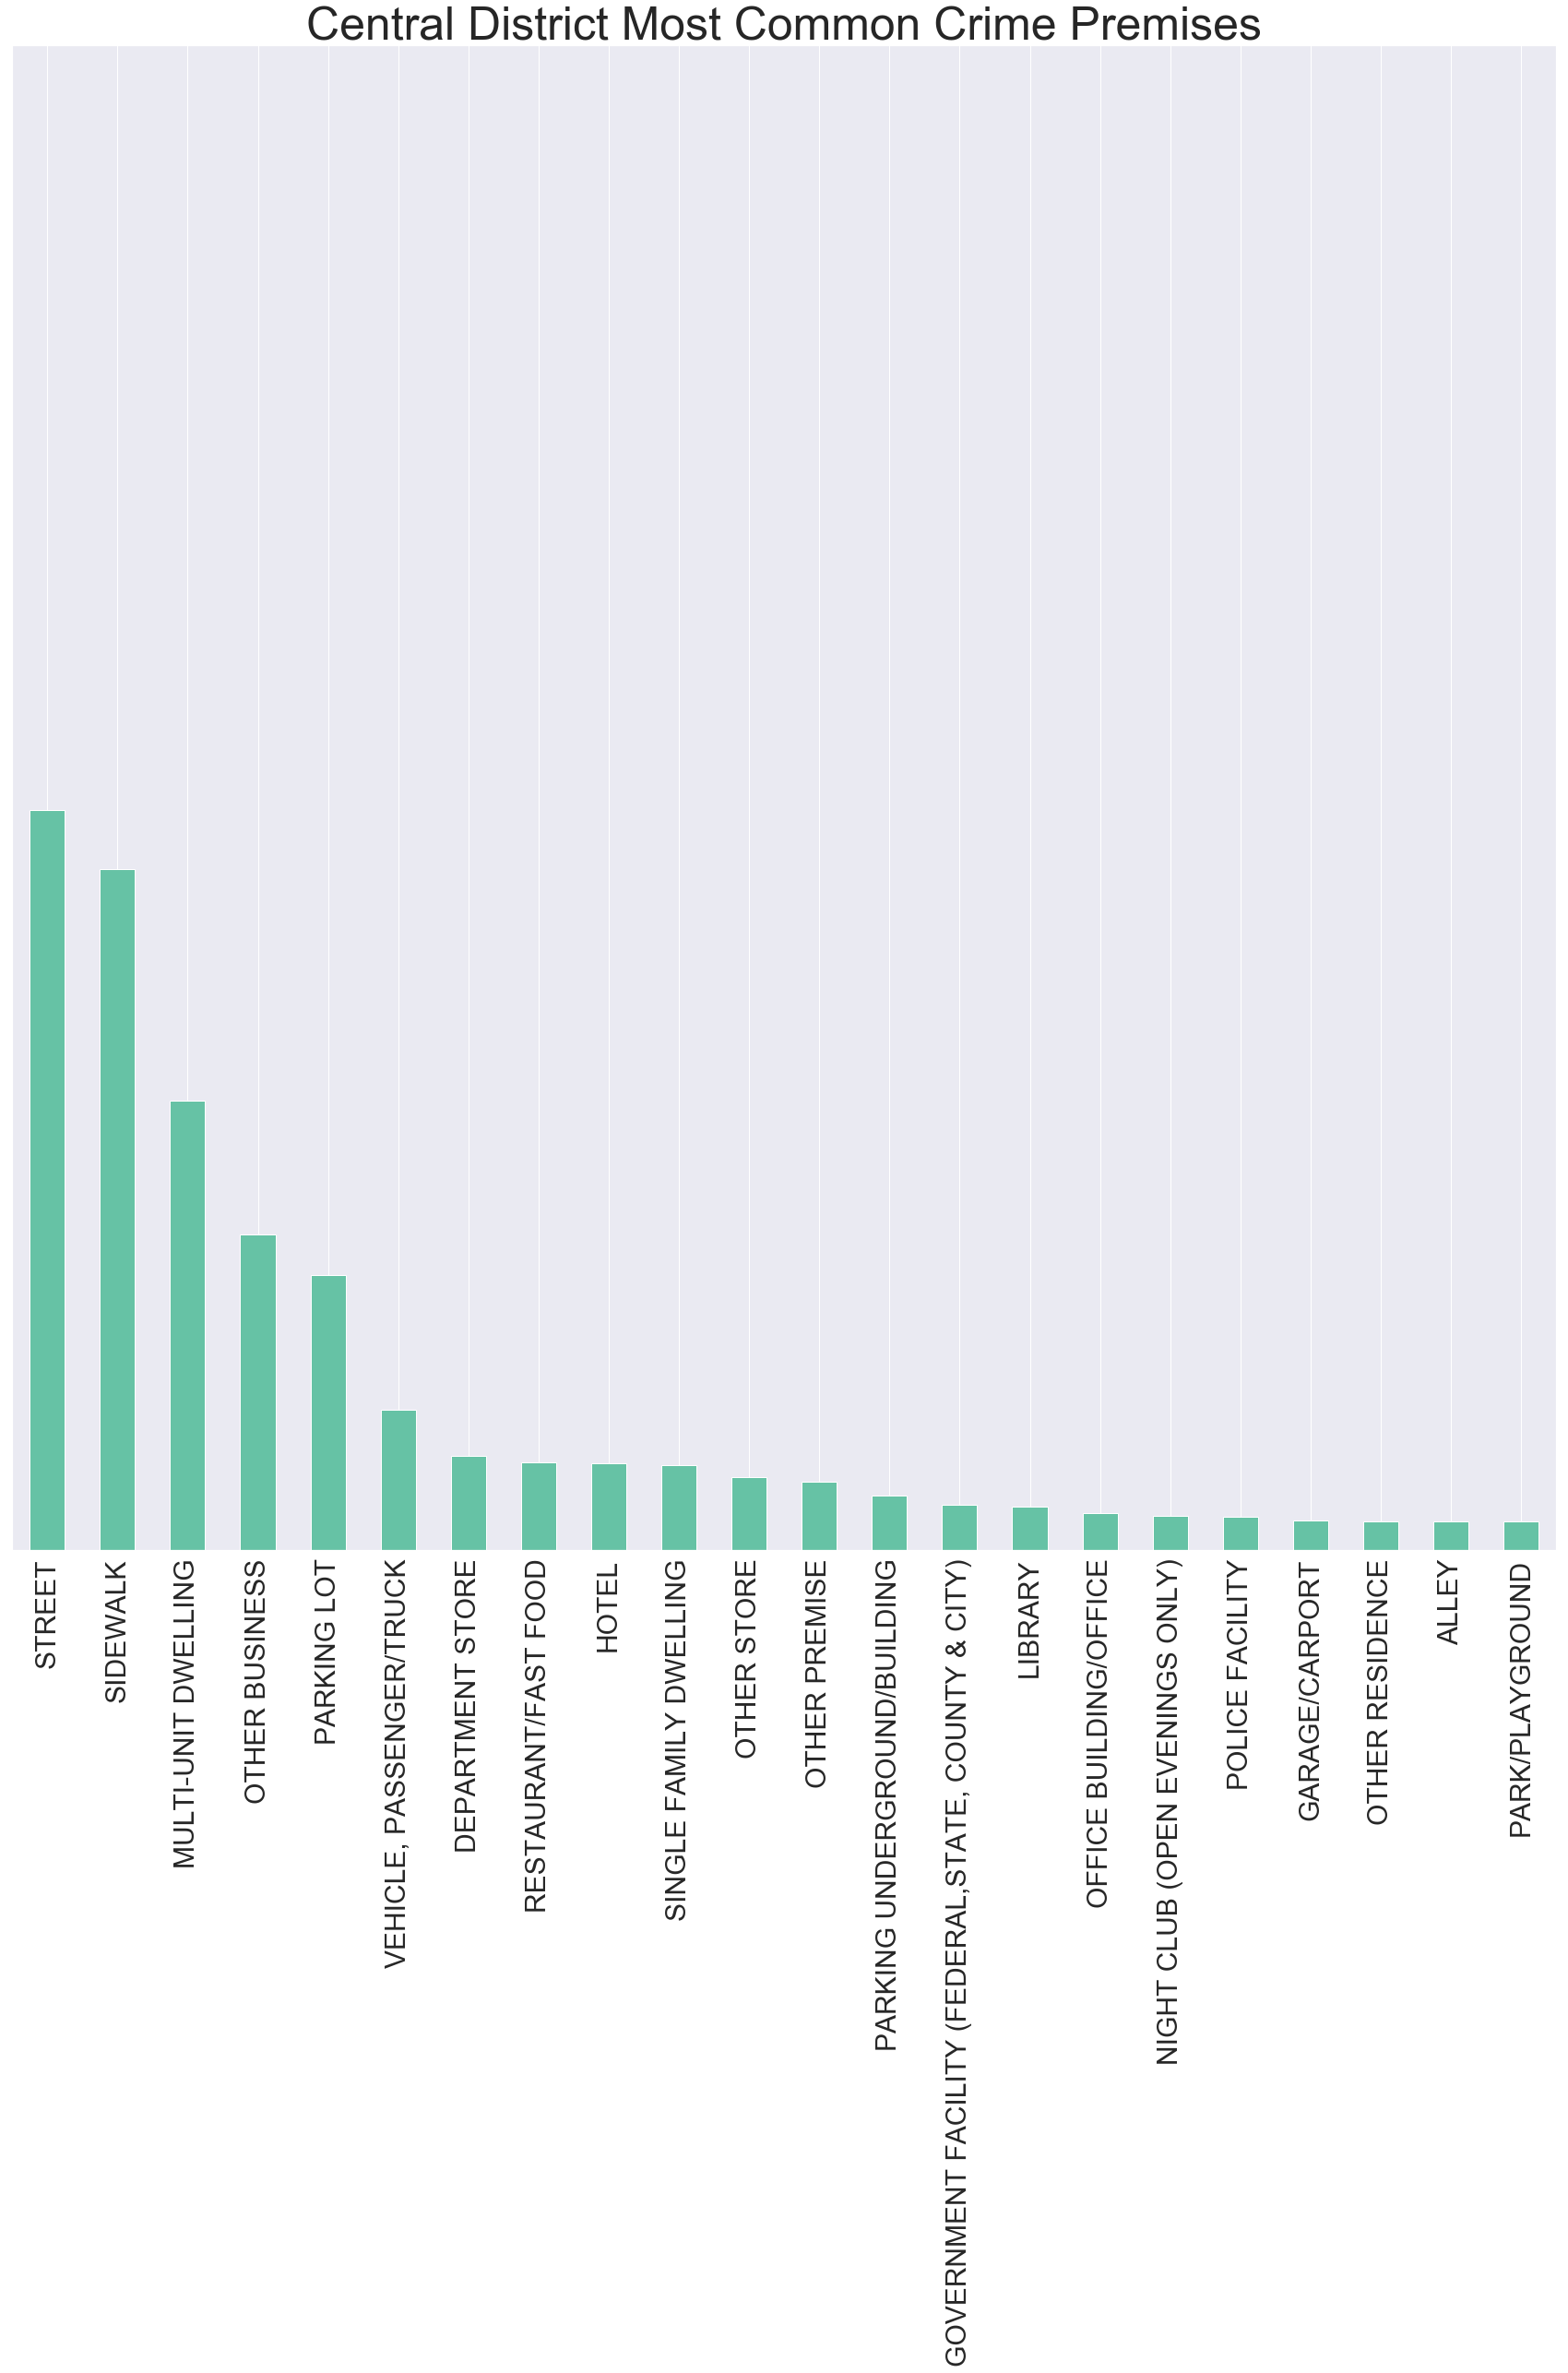

In [49]:
area_premise=df.loc[:,['Premise Description','Area Name']]
central_premise=area_premise[area_premise['Area Name']=='Central']
central_premise=central_premise.drop(columns='Area Name')
central_premise=central_premise['Premise Description'].value_counts().to_frame('Count')
central_premise=central_premise[central_premise['Count']>500]
central_premise['Count'].plot(kind='bar',figsize=(30,30),colormap='Set2')
plt.title('Central District Most Common Crime Premises',fontsize=50)
plt.xticks(fontsize=30)
plt.yticks([])
plt.ylim(0,30000)
plt.yticks(fontsize=30)
plt.yticks(fontsize=30)

In [50]:
theft_assault_info=df.loc[:,['Area Name','Crime','Premise Description']]
theft_assault_info.set_index('Area Name',inplace=True)
theft_assault_info=theft_assault_info.loc[['Central','Olympic','Newton','Hollenbeck']]
theft_assault_info=theft_assault_info.loc['Newton']
theft_assault_info.reset_index(inplace=True)
theft_assault_info=theft_assault_info.groupby(['Crime','Area Name','Premise Description']).size().to_frame('Count') 
theft_assault_info.reset_index(inplace=True)
theft_assault_info.set_index('Area Name',inplace=True)
theft_assault_info=theft_assault_info.loc['Newton']
theft_assault_info.reset_index(inplace=True)
theft_assault_info=theft_assault_info[theft_assault_info['Count']>0]
theft_assault_info.drop(columns='Area Name',inplace=True)
theft_assault_info.set_index(['Premise Description','Crime'],inplace=True)
theft_assault_info=theft_assault_info.unstack(level='Crime',fill_value=0)
premise=['STREET','SIDEWALK','MULTI-UNIT DWELLING','PARKING LOT','OTHER BUSINESS','DEPARTMENT STORE','OTHER STORE']
theft_assault_info['Count'].loc[premise].plot(kind='bar',stacked=True,colormap='tab20',figsize=(100,100)) 
plt.xticks(fontsize=120)
plt.yticks(fontsize=120)
plt.legend(loc='upper right',prop={'size':120})
plt.title('Newton District',fontsize=200)
plt.xlabel('Premise',fontsize=200)
plt.tight_layout()
plt.ylabel('Crime Count',fontsize=200)

Text(552.625,0.5,'Crime Count')

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 7 Text yticklabel objects>)

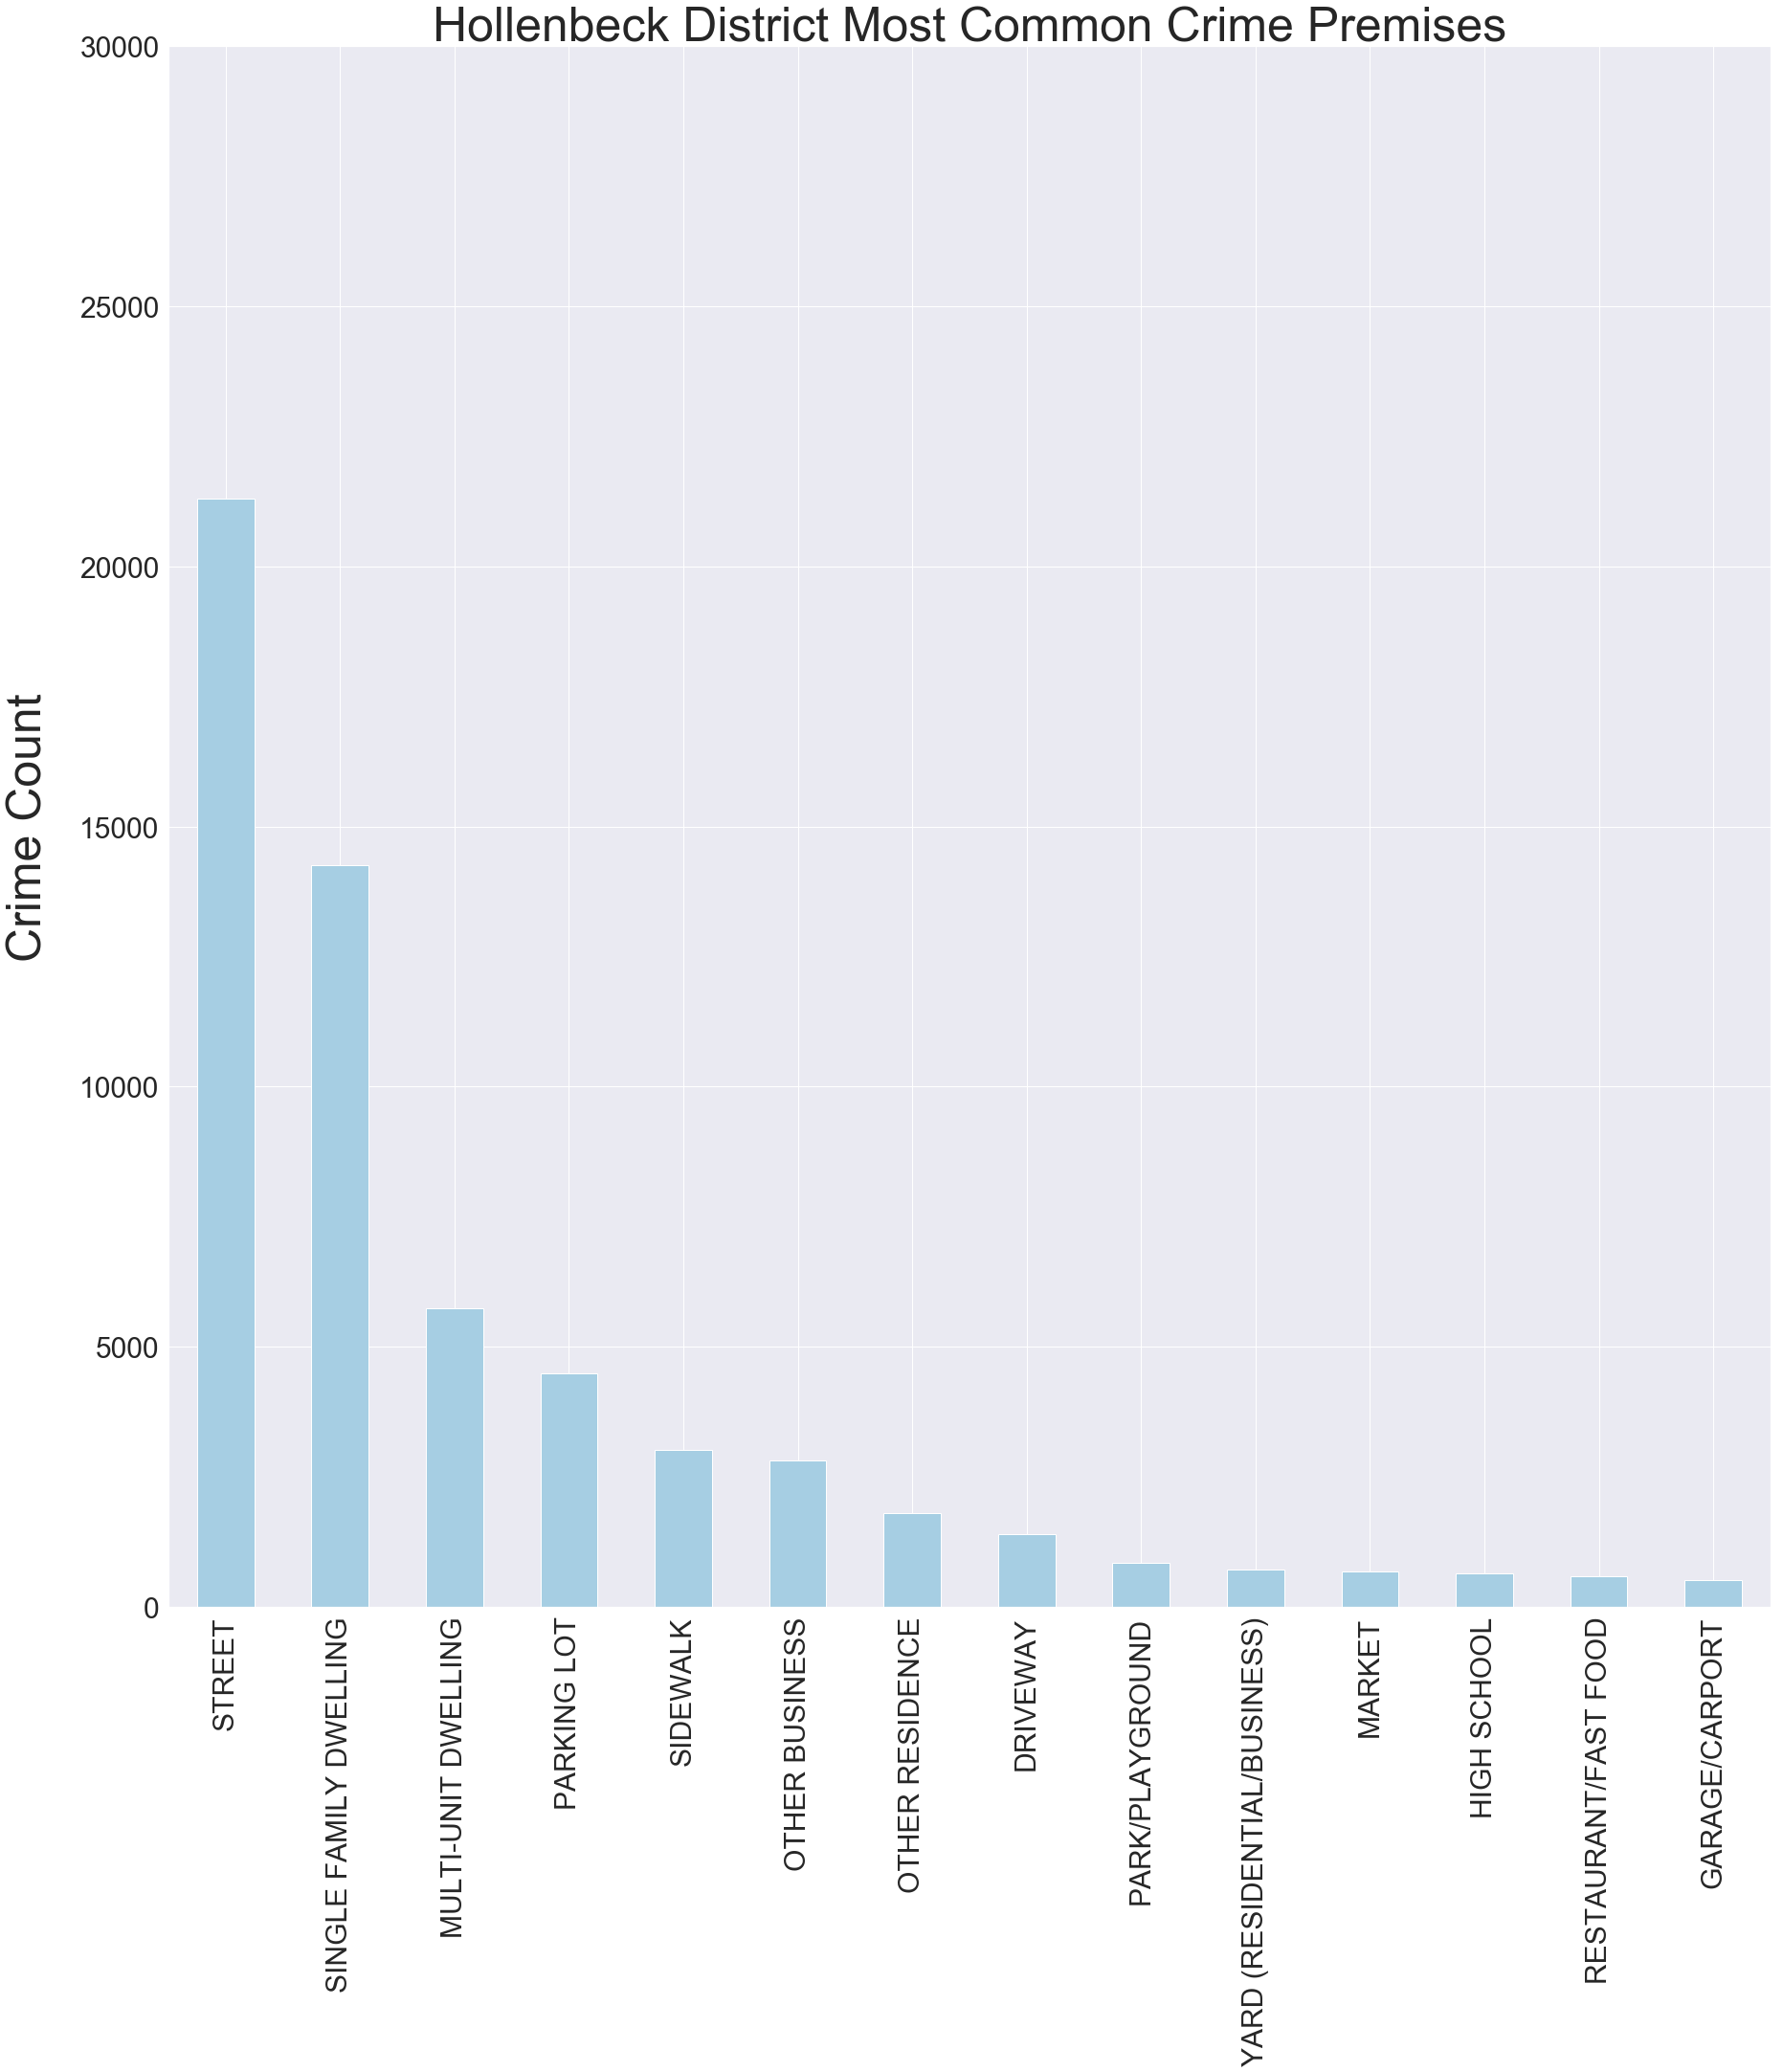

In [51]:
hollenbeck_premise=area_premise[area_premise['Area Name']=='Hollenbeck']
hollenbeck_premise=hollenbeck_premise.drop(columns='Area Name')
hollenbeck_premise=hollenbeck_premise['Premise Description'].value_counts().to_frame('Count')
hollenbeck_premise=hollenbeck_premise[hollenbeck_premise['Count']>500]
hollenbeck_premise['Count'].plot(kind='bar',figsize=(30,30),colormap='Paired')
plt.title('Hollenbeck District Most Common Crime Premises',fontsize=50)
plt.xticks(fontsize=30)
plt.ylabel('Crime Count',fontsize=50,labelpad=30)
plt.ylim(0,30000)
plt.yticks(fontsize=30)

In [52]:
theft_assault_info=df.loc[:,['Area Name','Crime','Premise Description']]
theft_assault_info.set_index('Area Name',inplace=True)
theft_assault_info=theft_assault_info.loc[['Central','Olympic','Newton','Hollenbeck']]
theft_assault_info=theft_assault_info.loc['Hollenbeck']
theft_assault_info.reset_index(inplace=True)
theft_assault_info=theft_assault_info.groupby(['Crime','Area Name','Premise Description']).size().to_frame('Count') 
theft_assault_info.reset_index(inplace=True)
theft_assault_info=theft_assault_info[theft_assault_info['Count']>0]
theft_assault_info.drop(columns='Area Name',inplace=True)
theft_assault_info.set_index(['Premise Description','Crime'],inplace=True)
theft_assault_info=theft_assault_info.unstack(level='Crime',fill_value=0)
premise=['STREET','MULTI-UNIT DWELLING','PARKING LOT','OTHER BUSINESS','SIDEWALK','DEPARTMENT STORE','OTHER STORE']
theft_assault_info =theft_assault_info['Count'].loc[premise].plot(kind='bar',stacked=True,colormap='tab20',figsize=(100,100)) 
plt.xticks(fontsize=120)
plt.yticks(fontsize=120)
plt.legend(loc='upper right',prop={'size':120})
plt.title('Hollenbeck District',fontsize=200)
plt.xlabel('Premise',fontsize=200)
plt.tight_layout()

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 7 Text yticklabel objects>)

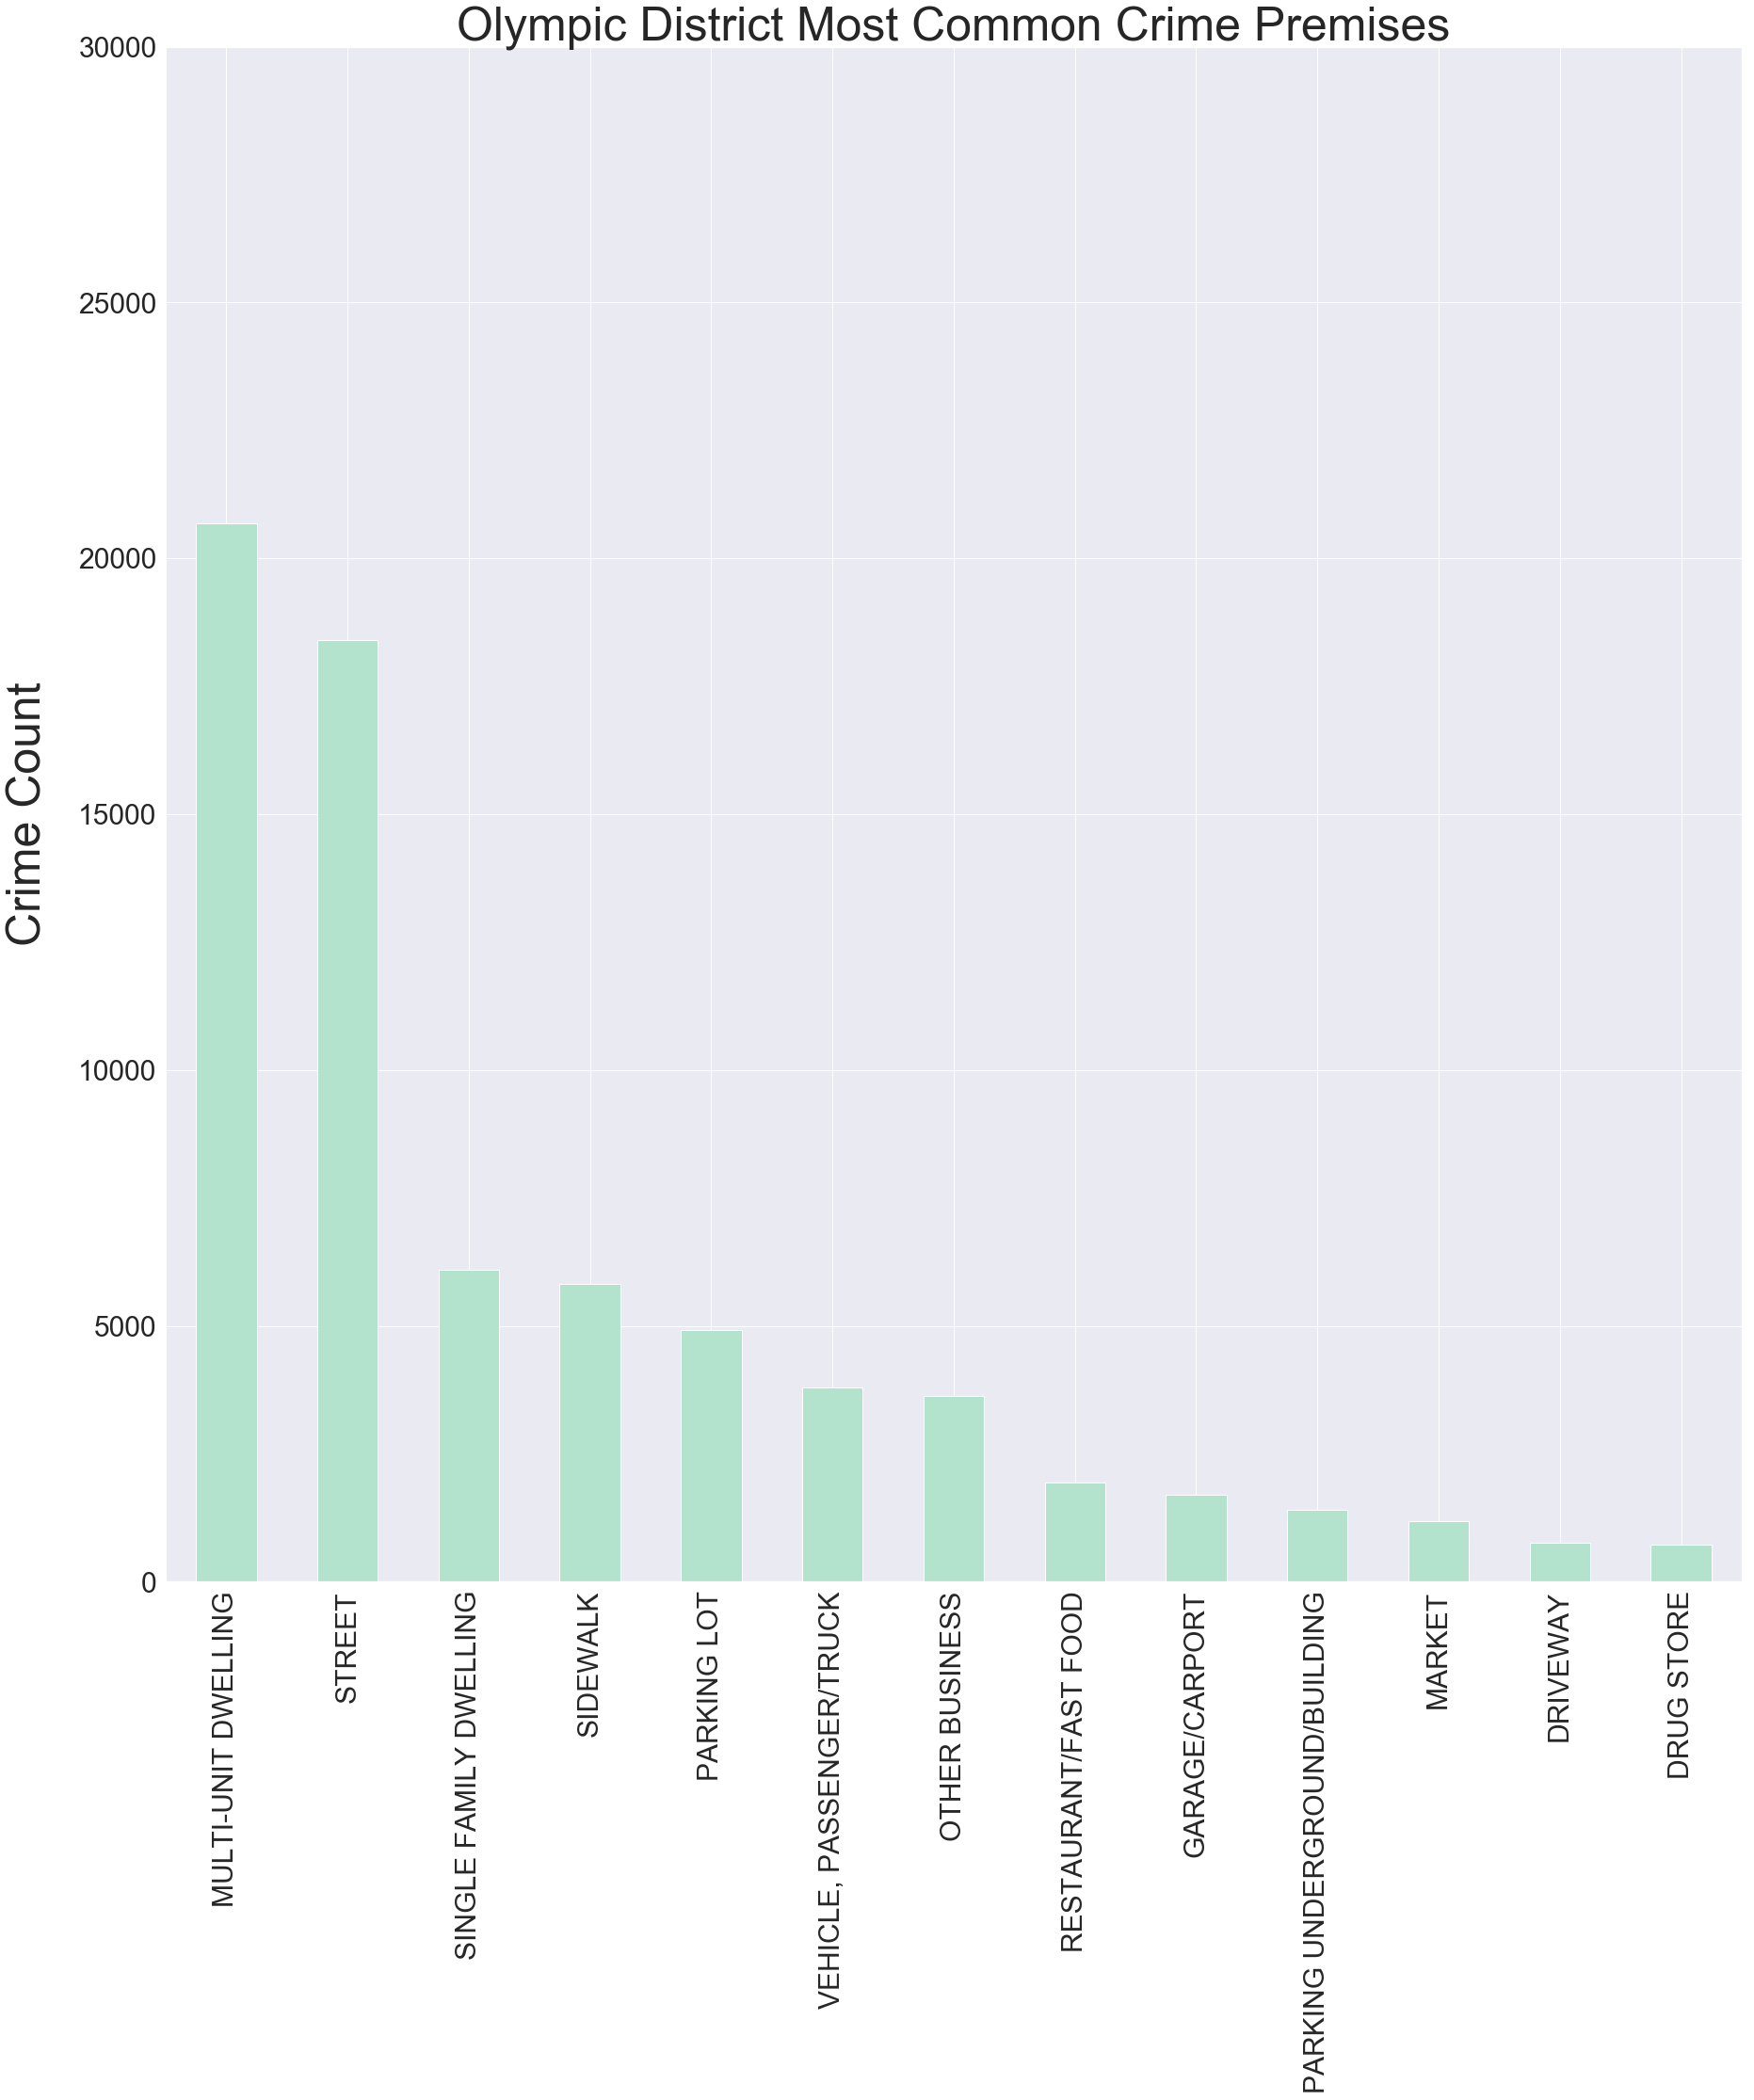

In [53]:
olympic_premise=area_premise[area_premise['Area Name']=='Olympic']
olympic_premise=olympic_premise.drop(columns='Area Name')
olympic_premise=olympic_premise['Premise Description'].value_counts().to_frame('Count')
olympic_premise=olympic_premise[olympic_premise['Count']>500]
olympic_premise['Count'].plot(kind='bar',figsize=(30,30),colormap='Pastel2')
plt.title('Olympic District Most Common Crime Premises',fontsize=50)
plt.xticks(fontsize=30)
plt.ylim(0,30000)
plt.ylabel('Crime Count',fontsize=50,labelpad=30)
plt.yticks()
plt.yticks(fontsize=30)

In [54]:
crimeloc_info=df.loc[:,['Area Name','Crime','Premise Description']]
crimeloc_info.set_index('Area Name',inplace=True)
crimeloc_info=crimeloc_info.loc[['Central','Olympic','Newton','Hollenbeck']]
crimeloc_info=crimeloc_info.groupby(['Crime','Area Name','Premise Description']).size().to_frame('Count') 
crimeloc_info.reset_index(inplace=True)
crimeloc_info.set_index(['Premise Description','Area Name','Crime'],inplace=True) 
crimeloc_info=crimeloc_info.unstack(level=['Area Name','Crime'],fill_value=0)
crimeloc_info


Count                     \
Area Name                                          Central Hollenbeck  Newton   
Crime                                              Assault    Assault Assault   
Premise Description                                                             
7TH AND METRO CENTER (NOT LINE SPECIFIC)                 8          0       0   
ABANDONED BUILDING ABANDONED HOUSE                       0          0       3   
ABATEMENT LOCATION                                       0          0       1   
ABORTION CLINIC/ABORTION FACILITY*                       0          0       1   
AIRCRAFT                                                 0          0       1   
ALLEY                                                  165        153     243   
AMTRAK TRAIN                                             1          0       0   
APARTMENT/CONDO COMMON LAUNDRY ROOM                      0          0       0   
ARCADE,GAME ROOM/VIDEO GAMES (EXAMPLE CHUCKIE C...       3          0       0   
AUTO DEALERSHIP (CHEVY, FORD, BMW, MERCEDES, ETC.)       1          0       0   
AUTO REPAIR SHOP                                         2         17       7   
AUTO SALES LOT                                           1          0       3   
AUTO SUPPLY STORE*                                       0          2       1   
AUTOMATED TELLER MACHINE (ATM)                           0          0       0   
BALCONY*                                                 1          0       0   
BANK                                                    10          1       4   
BANKING INSIDE MARKET-STORE *                            0          0       0   
BAR/COCKTAIL/NIGHTCLUB                                 205         36      33   
BAR/SPORTS BAR (OPEN DAY & NIGHT)                       43          3      10   
BASKETBALL COURTS                                        0          0       0   
BEAUTY SUPPLY STORE                                      1          0       0   
BEAUTY/BARBER SHOP                                       3          9       6   
BOOK STORE                                               0          0       0   
BOWLING ALLEY*                                          10          0       0   
BUS DEPOT                                                7          0      12   
BUS DEPOT/TERMINAL, OTHER THAN MTA                       0          0       1   
BUS STOP                                                77         22      41   
BUS STOP OR LAYOVER                                      3          3       6   
BUS STOP/LAYOVER (ALSO QUERY 124)                        0          0       4   
BUS, SCHOOL, CHURCH                                      6         10       1   
...                                                    ...        ...     ...   
TERMINAL, OTHER THAN MTA                                 0          0       1   
THEATRE/MOVIE                                           53          0       0   
TOBACCO SHOP                                             0          0       0   
TOOL SHED*                                               0          0       1   
TOW YARD*                                                1          5       2   
TRADE SCHOOL (MEDICAL-TECHNICAL-BUSINESS)*               3          2      11   
TRAIN                                                    5          1       0   
TRAIN DEPOT                                             14          1       1   
TRAIN DEPOT/TERMINAL, OTHER THAN MTA                     2          0       0   
TRAIN TRACKS                                             0          1       0   
TRAIN, OTHER THAN MTA (ALSO QUERY 809/810/811)           0          1       0   
TRAM/STREETCAR(BOXLIKE WAG ON RAILS)*                    0          0       1   
TRANSIENT ENCAMPMENT                                     0          0       2   
TRANSITIONAL HOUSING/HALFWAY HOUSE                       0          0       2   
TRANSPORTATION FACILITY (AIRPORT)                        0          0       4   
TRA

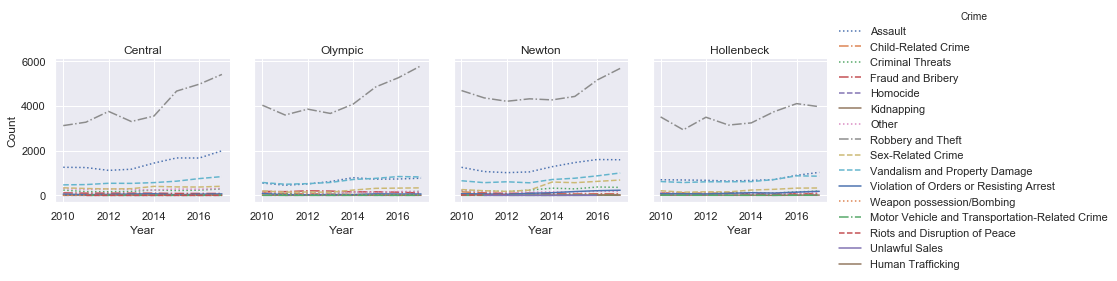

In [113]:
inv_cont=df.loc[:,['Date Occurred_Time Occurred','Crime','Status Description','Area Name']]
inv_cont=inv_cont[inv_cont['Status Description']=='Invest Cont']
inv_cont=inv_cont.set_index('Area Name')
inv_cont=inv_cont.loc[['Central','Olympic','Newton','Hollenbeck']]
inv_cont['Year']=inv_cont['Date Occurred_Time Occurred'].dt.year
inv_cont=inv_cont[inv_cont['Year']!=2018]
inv_cont.drop(columns=['Date Occurred_Time Occurred','Status Description'],inplace=True)
inv_cont=inv_cont.groupby(['Year','Area Name','Crime']).size().to_frame('Count')
inv_cont.reset_index(inplace=True)
g=sns.FacetGrid(inv_cont,col='Area Name',hue='Crime',palette='deep',hue_kws={'ls':[':','-.',':','-.','--','-',':','-.','--','--','-',':','-.','--','-','-',':']},col_order=['Central','Olympic','Newton','Hollenbeck'])
g.map(plt.plot,'Year','Count')
g.add_legend()
g.set_titles("{col_name}")

In [121]:
inv_cont=df.loc[:,['Year','Crime','Status Description','Area Name']]
inv_cont=inv_cont[inv_cont['Status Description']=='Invest Cont']

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


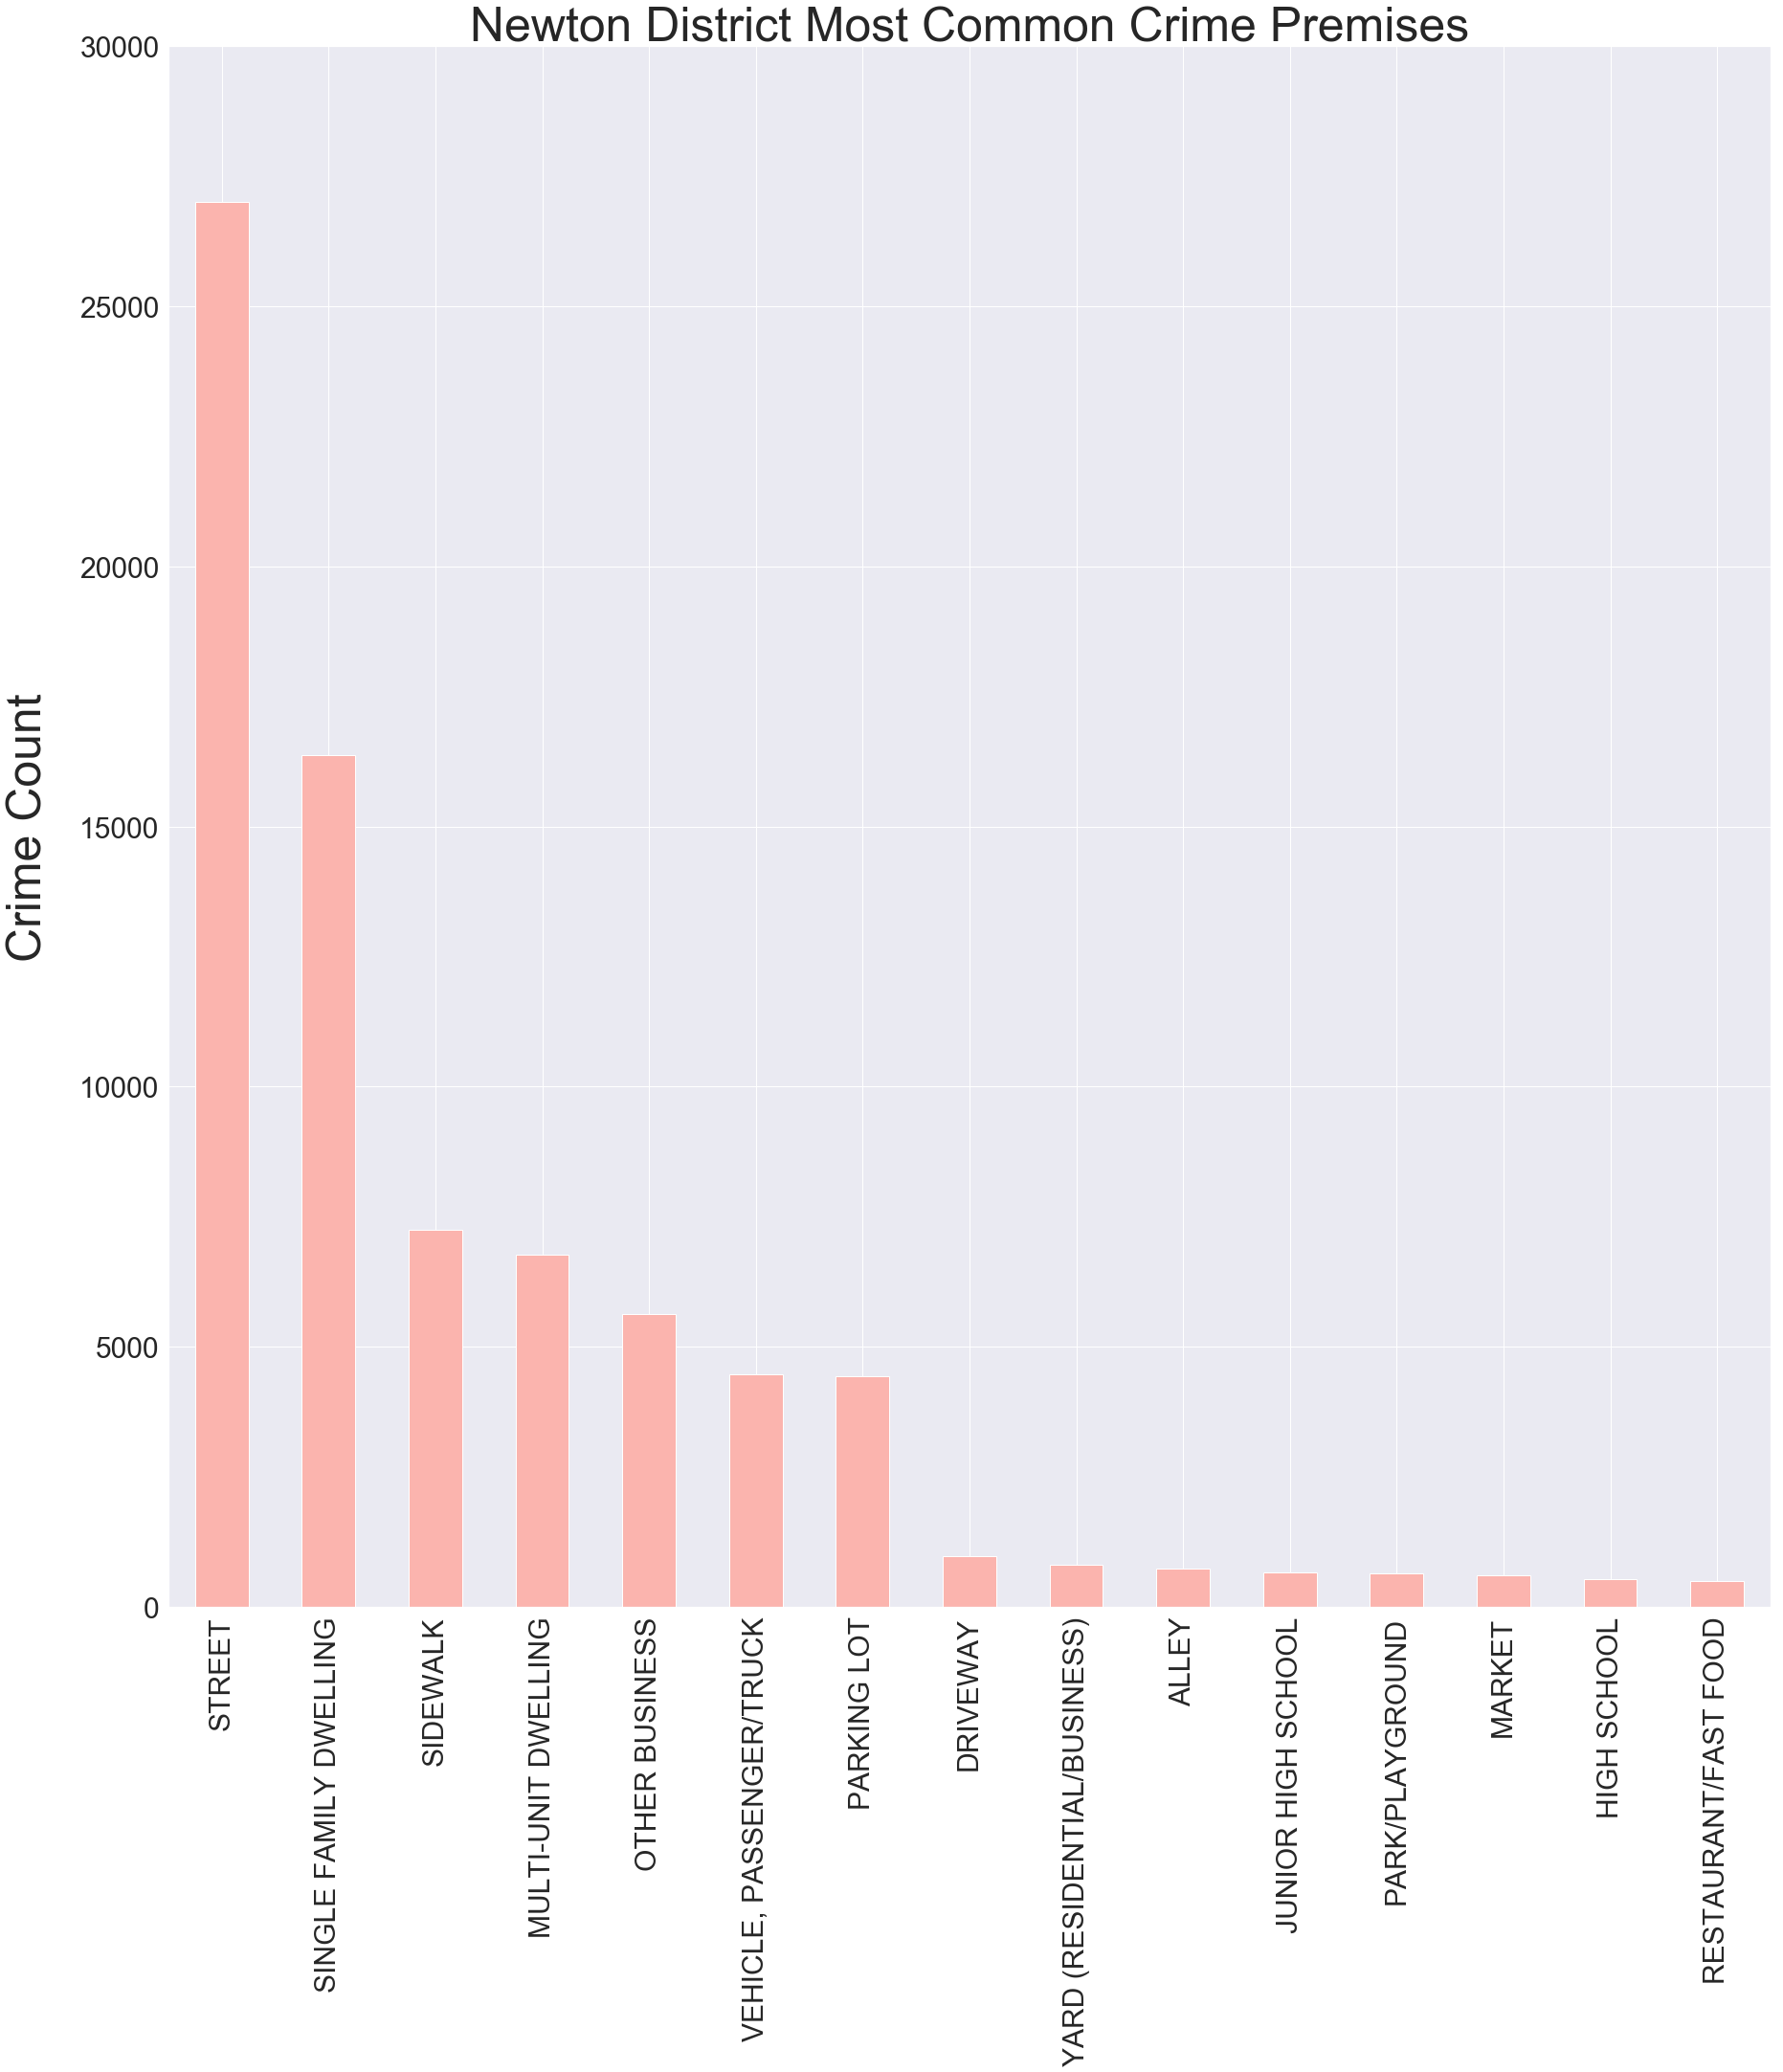

In [56]:
newton_premise=area_premise[area_premise['Area Name']=='Newton']
newton_premise=newton_premise.drop(columns='Area Name')
newton_premise=newton_premise['Premise Description'].value_counts().to_frame('Count')
newton_premise=newton_premise[newton_premise['Count']>500]
newton_premise['Count'].plot(kind='bar',figsize=(30,30),colormap='Pastel1')
plt.title('Newton District Most Common Crime Premises',fontsize=50)
plt.xticks(fontsize=30)
plt.ylim(0,30000)
plt.ylabel('Crime Count',fontsize=50,labelpad=30)
plt.yticks(fontsize=30)
ax=plt.gca()
ax.yaxis.grid(True)

In [57]:
df.head()

Date Occurred_Time Occurred    Area Name  \
0         2013-03-11 18:00:00  77th Street   
1         2010-01-22 23:00:00      Olympic   
2         2013-03-18 20:30:00    Southeast   
3         2010-11-10 18:00:00    Southeast   
4         2014-01-04 23:00:00      Topanga   

                     Crime Code Description Victim Age Victim Sex  \
0         INTIMATE PARTNER - SIMPLE ASSAULT         30          F   
1                          VEHICLE - STOLEN    Missing    Missing   
2                          VEHICLE - STOLEN         12    Missing   
3                          VEHICLE - STOLEN    Missing    Missing   
4  VANDALISM - MISDEAMEANOR ($399 OR UNDER)         84          M   

  Victim Descent     Premise Description Status Description  \
0              W     MULTI-UNIT DWELLING        Adult Other   
1        Missing                  STREET        Invest Cont   
2        Missing                  STREET        Invest Cont   
3        Missing                  STREET        Invest Cont   
4              W  SINGLE FAMILY DWELLING        Invest Cont   

              Location  Date Occurred Time Occurred  Hour  Minute  Hour_sin  \
0  (33.9829, -118.3338)    2013-03-11      18:00:00    18       0 -1.000000   
1  (34.0454, -118.3157)    2010-01-22      23:00:00    23       0 -0.258819   
2   (33.942, -118.2717)    2013-03-18      20:30:00    20      30 -0.866025   
3  (33.9572, -118.2717)    2010-11-10      18:00:00    18       0 -1.000000   
4  (34.2009, -118.6369)    2014-01-04      23:00:00    23       0 -0.258819   

       Hour_cos       Min_sin  Min_cos Time Code  \
0 -1.836970e-16  0.000000e+00      1.0   Evening   
1  9.659258e-01  0.000000e+00      1.0     Night   
2  5.000000e-01 -1.715001e-14      1.0   Evening   
3 -1.836970e-16  0.000000e+00      1.0   Evening   
4  9.659258e-01  0.000000e+00      1.0     Night   

                           Crime                   Crime_Detailed  
0              Sex-Related Crime  Rape and Sexual Assault/Battery  
1              Robbery and Theft     Vehicle/Transportation Theft  
2              Robbery and Theft     Vehicle/Transportation Theft  
3              Robbery and Theft     Vehicle/Transportation Theft  
4  Vandalism and Property Damage    Vandalism and Property Damage

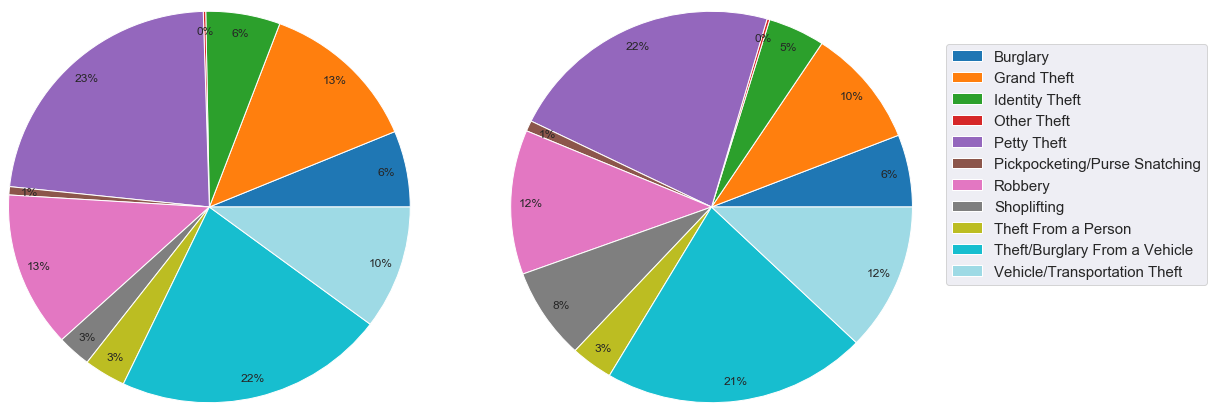

In [58]:
dcrime_by_district=df.loc[:,['Area Name','Crime','Crime_Detailed','Date Occurred_Time Occurred']]
dcrime_by_district['Date Occurred']=dcrime_by_district['Date Occurred_Time Occurred'].dt.year
dcrime_central=dcrime_by_district[(dcrime_by_district['Area Name']=='Central') & (dcrime_by_district['Crime']=='Robbery and Theft')]
dcrime_central_before=dcrime_central[dcrime_central['Date Occurred']<2013]
dcrime_central_after=dcrime_central[dcrime_central['Date Occurred']>=2013]
dcrime_central_before=dcrime_central_before.groupby(['Crime_Detailed']).size().to_frame('Count')
dcrime_central_after=dcrime_central_after.groupby(['Crime_Detailed']).size().to_frame('Count')
figs,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
dcrime_central_after.plot.pie(ax=axes[1],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5)
dcrime_central_before.plot.pie(ax=axes[0],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5,legend=False)
figs.subplots_adjust(wspace=.5)
axes[1].legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.,prop={'size':15},labels=dcrime_central_after.index)

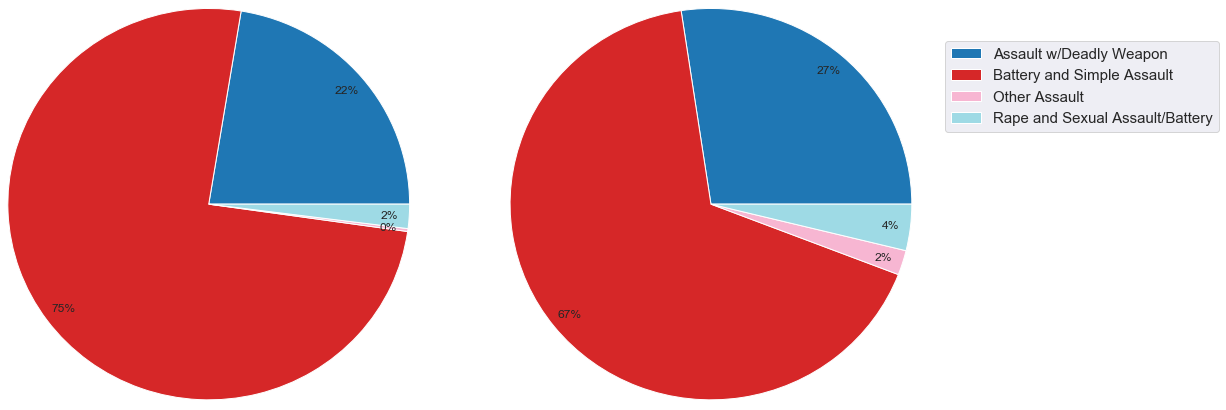

In [59]:
dcrime_by_district=df.loc[:,['Area Name','Crime','Crime_Detailed','Date Occurred_Time Occurred']]
dcrime_by_district['Date Occurred']=dcrime_by_district['Date Occurred_Time Occurred'].dt.year
dcrime_central=dcrime_by_district[(dcrime_by_district['Area Name']=='Central') & (dcrime_by_district['Crime']=='Assault')]
dcrime_central_before=dcrime_central[dcrime_central['Date Occurred']<2013]
dcrime_central_after=dcrime_central[dcrime_central['Date Occurred']>=2013]
dcrime_central_before=dcrime_central_before.groupby(['Crime_Detailed']).size().to_frame('Count')
dcrime_central_after=dcrime_central_after.groupby(['Crime_Detailed']).size().to_frame('Count')
figs,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
dcrime_central_after.plot.pie(ax=axes[1],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5)
dcrime_central_before.plot.pie(ax=axes[0],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5,legend=False)
figs.subplots_adjust(wspace=.5)
axes[1].legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.,prop={'size':15},labels=dcrime_central_after.index)

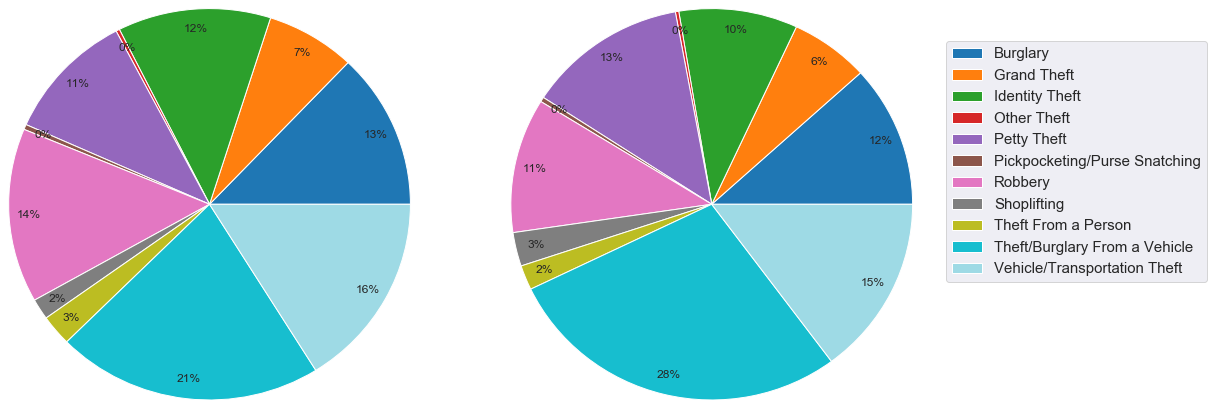

In [60]:
dcrime_olympic=dcrime_by_district[(dcrime_by_district['Area Name']=='Olympic') & (dcrime_by_district['Crime']=='Robbery and Theft')]
dcrime_olympic_before=dcrime_olympic[dcrime_olympic['Date Occurred']<2013]
dcrime_olympic_after=dcrime_olympic[dcrime_olympic['Date Occurred']>=2013]
dcrime_olympic_before=dcrime_olympic_before.groupby(['Crime_Detailed']).size().to_frame('Count')
dcrime_olympic_after=dcrime_olympic_after.groupby(['Crime_Detailed']).size().to_frame('Count')
figs,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
dcrime_olympic_after.plot.pie(ax=axes[1],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5)
dcrime_olympic_before.plot.pie(ax=axes[0],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5,legend=False)
figs.subplots_adjust(wspace=.5)
axes[1].legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.,prop={'size':15},labels=dcrime_olympic_after.index)

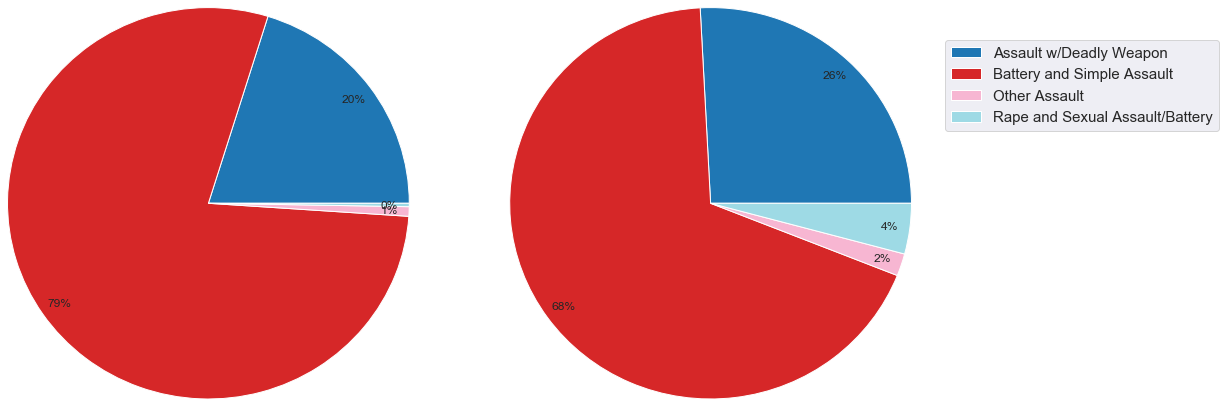

In [61]:
dcrime_olympic=dcrime_by_district[(dcrime_by_district['Area Name']=='Olympic') & (dcrime_by_district['Crime']=='Assault')]
dcrime_olympic_before=dcrime_olympic[dcrime_olympic['Date Occurred']<2013]
dcrime_olympic_after=dcrime_olympic[dcrime_olympic['Date Occurred']>=2013]
dcrime_olympic_before=dcrime_olympic_before.groupby(['Crime_Detailed']).size().to_frame('Count')
dcrime_olympic_after=dcrime_olympic_after.groupby(['Crime_Detailed']).size().to_frame('Count')
figs,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
dcrime_olympic_after.plot.pie(ax=axes[1],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5)
dcrime_olympic_before.plot.pie(ax=axes[0],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5,legend=False)
figs.subplots_adjust(wspace=.5)
axes[1].legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.,prop={'size':15},labels=dcrime_olympic_after.index)

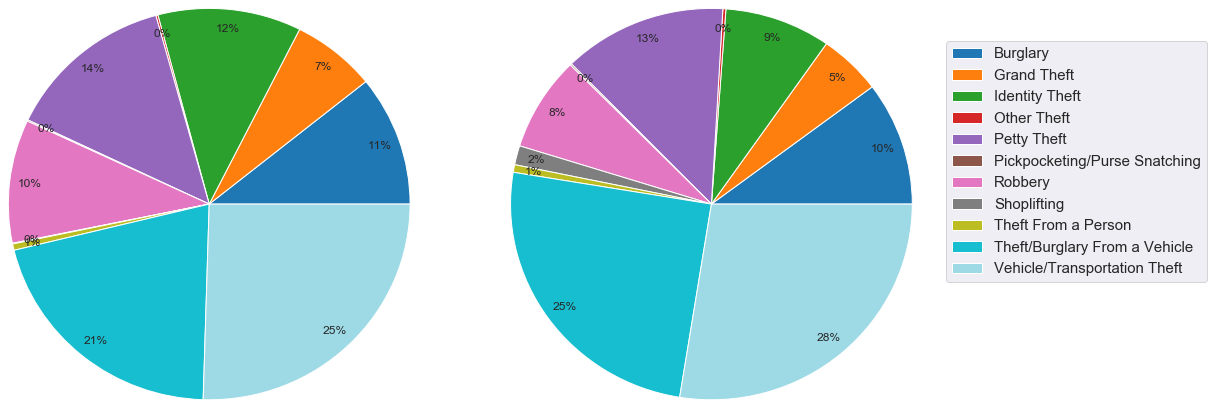

In [62]:
dcrime_hollenbeck=dcrime_by_district[(dcrime_by_district['Area Name']=='Hollenbeck') & (dcrime_by_district['Crime']=='Robbery and Theft')]
dcrime_hollenbeck_before=dcrime_hollenbeck[dcrime_hollenbeck['Date Occurred']<2013]
dcrime_hollenbeck_after=dcrime_hollenbeck[dcrime_hollenbeck['Date Occurred']>=2013]
dcrime_hollenbeck_before=dcrime_hollenbeck_before.groupby(['Crime_Detailed']).size().to_frame('Count')
dcrime_hollenbeck_after=dcrime_hollenbeck_after.groupby(['Crime_Detailed']).size().to_frame('Count')
figs,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
dcrime_hollenbeck_after.plot.pie(ax=axes[1],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5)
dcrime_hollenbeck_before.plot.pie(ax=axes[0],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5,legend=False)
figs.subplots_adjust(wspace=.5)
axes[1].legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.,prop={'size':15},labels=dcrime_hollenbeck_after.index)

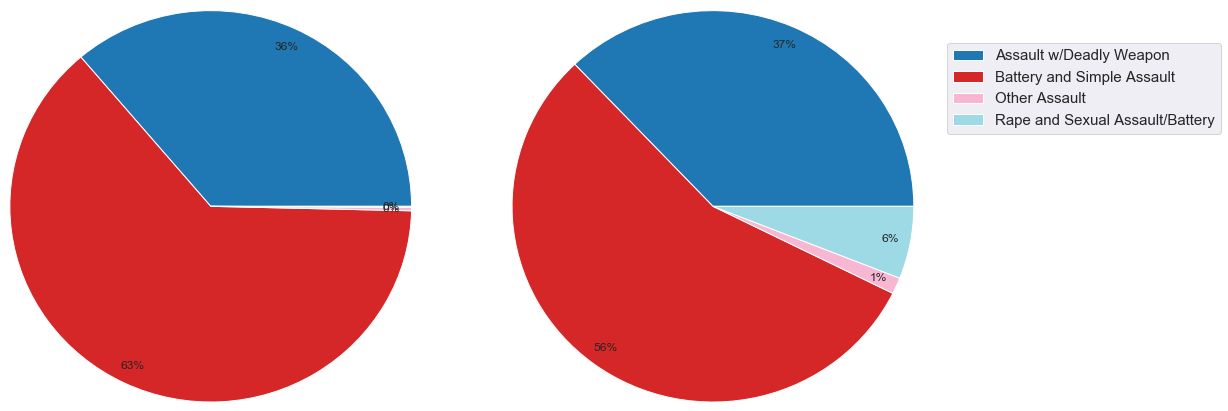

In [63]:
dcrime_hollenbeck=dcrime_by_district[(dcrime_by_district['Area Name']=='Hollenbeck') & (dcrime_by_district['Crime']=='Assault')]
dcrime_hollenbeck_before=dcrime_hollenbeck[dcrime_hollenbeck['Date Occurred']<2013]
dcrime_hollenbeck_after=dcrime_hollenbeck[dcrime_hollenbeck['Date Occurred']>=2013]
dcrime_hollenbeck_before=dcrime_hollenbeck_before.groupby(['Crime_Detailed']).size().to_frame('Count')
dcrime_hollenbeck_after=dcrime_hollenbeck_after.groupby(['Crime_Detailed']).size().to_frame('Count')
figs,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
dcrime_hollenbeck_after.plot.pie(ax=axes[1],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5)
dcrime_hollenbeck_before.plot.pie(ax=axes[0],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5,legend=False)
figs.subplots_adjust(wspace=.5)
axes[1].legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.,prop={'size':15},labels=dcrime_hollenbeck_after.index)

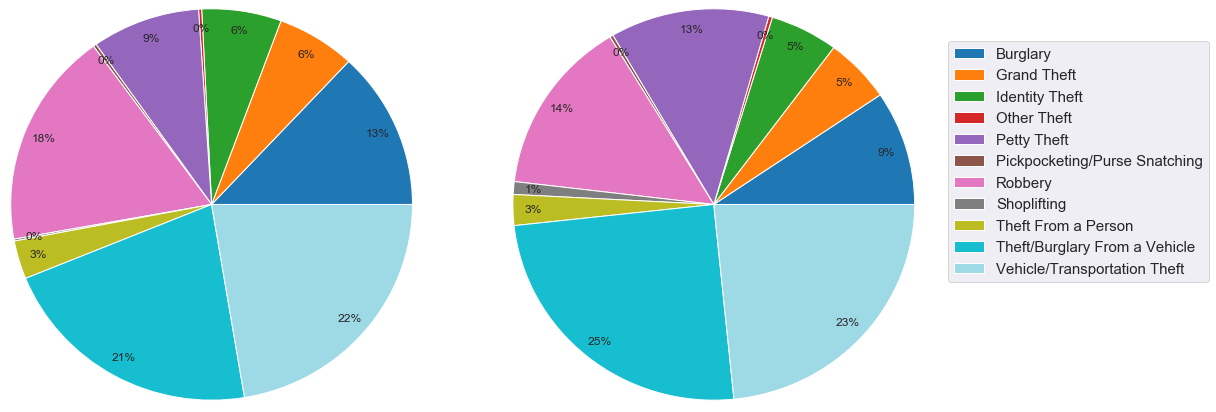

In [64]:
dcrime_newton=dcrime_by_district[(dcrime_by_district['Area Name']=='Newton') & (dcrime_by_district['Crime']=='Robbery and Theft')]
dcrime_newton_before=dcrime_newton[dcrime_newton['Date Occurred']<2013]
dcrime_newton_after=dcrime_newton[dcrime_newton['Date Occurred']>=2013]
dcrime_newton_before=dcrime_newton_before.groupby(['Crime_Detailed']).size().to_frame('Count')
dcrime_newton_after=dcrime_newton_after.groupby(['Crime_Detailed']).size().to_frame('Count')
figs,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
dcrime_newton_after.plot.pie(ax=axes[1],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5)
dcrime_newton_before.plot.pie(ax=axes[0],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5,legend=False)
figs.subplots_adjust(wspace=.5)
axes[1].legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.,prop={'size':15},labels=dcrime_newton_after.index)

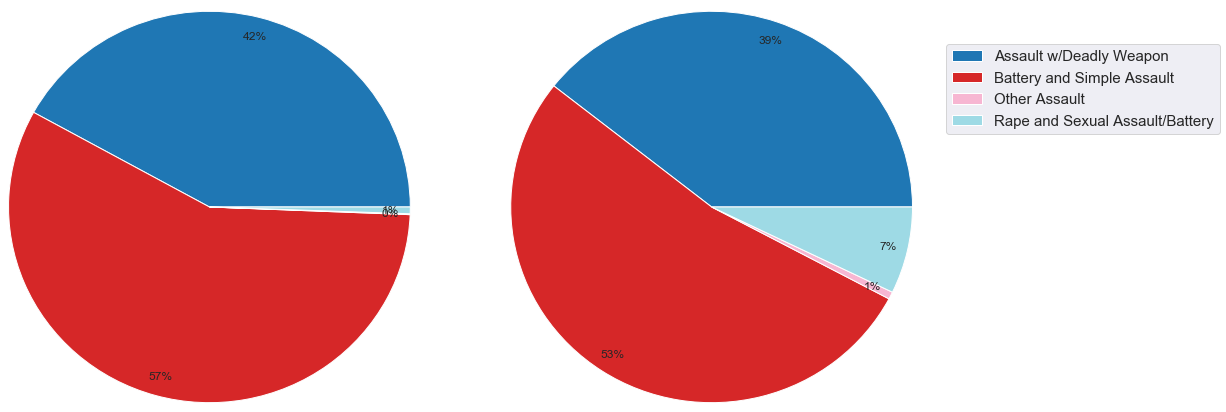

In [65]:
dcrime_newton=dcrime_by_district[(dcrime_by_district['Area Name']=='Newton') & (dcrime_by_district['Crime']=='Assault')]
dcrime_newton_before=dcrime_newton[dcrime_newton['Date Occurred']<2013]
dcrime_newton_after=dcrime_newton[dcrime_newton['Date Occurred']>=2013]
dcrime_newton_before=dcrime_newton_before.groupby(['Crime_Detailed']).size().to_frame('Count')
dcrime_newton_after=dcrime_newton_after.groupby(['Crime_Detailed']).size().to_frame('Count')
figs,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
dcrime_newton_after.plot.pie(ax=axes[1],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5)
dcrime_newton_before.plot.pie(ax=axes[0],y='Count',colormap='tab20',labels=None,autopct='%1.0f%%',pctdistance=.90, radius=1.5,legend=False)
figs.subplots_adjust(wspace=.5)
axes[1].legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.,prop={'size':15},labels=dcrime_newton_after.index)

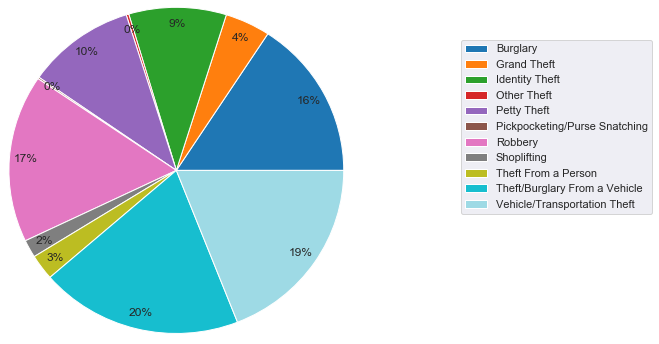

In [66]:
dcrime_77th=dcrime_by_district[(dcrime_by_district['Area Name']=='77th Street') & (dcrime_by_district['Crime']=='Robbery and Theft')]
dcrime_77th=dcrime_77th.groupby(['Crime_Detailed']).size().to_frame('Count')
dcrime_77th.plot.pie(y='Count',colormap='tab20',autopct='%1.0f%%',pctdistance=.90, radius=1.5,figsize=(5,5),labels=None)
plt.legend(bbox_to_anchor=(1.5,1),labels=dcrime_77th.index)

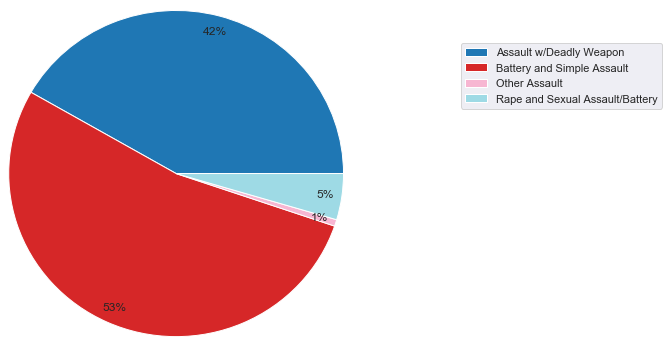

In [67]:
dcrime_77th=dcrime_by_district[(dcrime_by_district['Area Name']=='77th Street') & (dcrime_by_district['Crime']=='Assault')]
dcrime_77th=dcrime_77th.groupby(['Crime_Detailed']).size().to_frame('Count')
dcrime_77th.plot.pie(y='Count',colormap='tab20',autopct='%1.0f%%',pctdistance=.90, radius=1.5,figsize=(5,5),labels=None)
plt.legend(bbox_to_anchor=(1.5,1),labels=dcrime_77th.index)

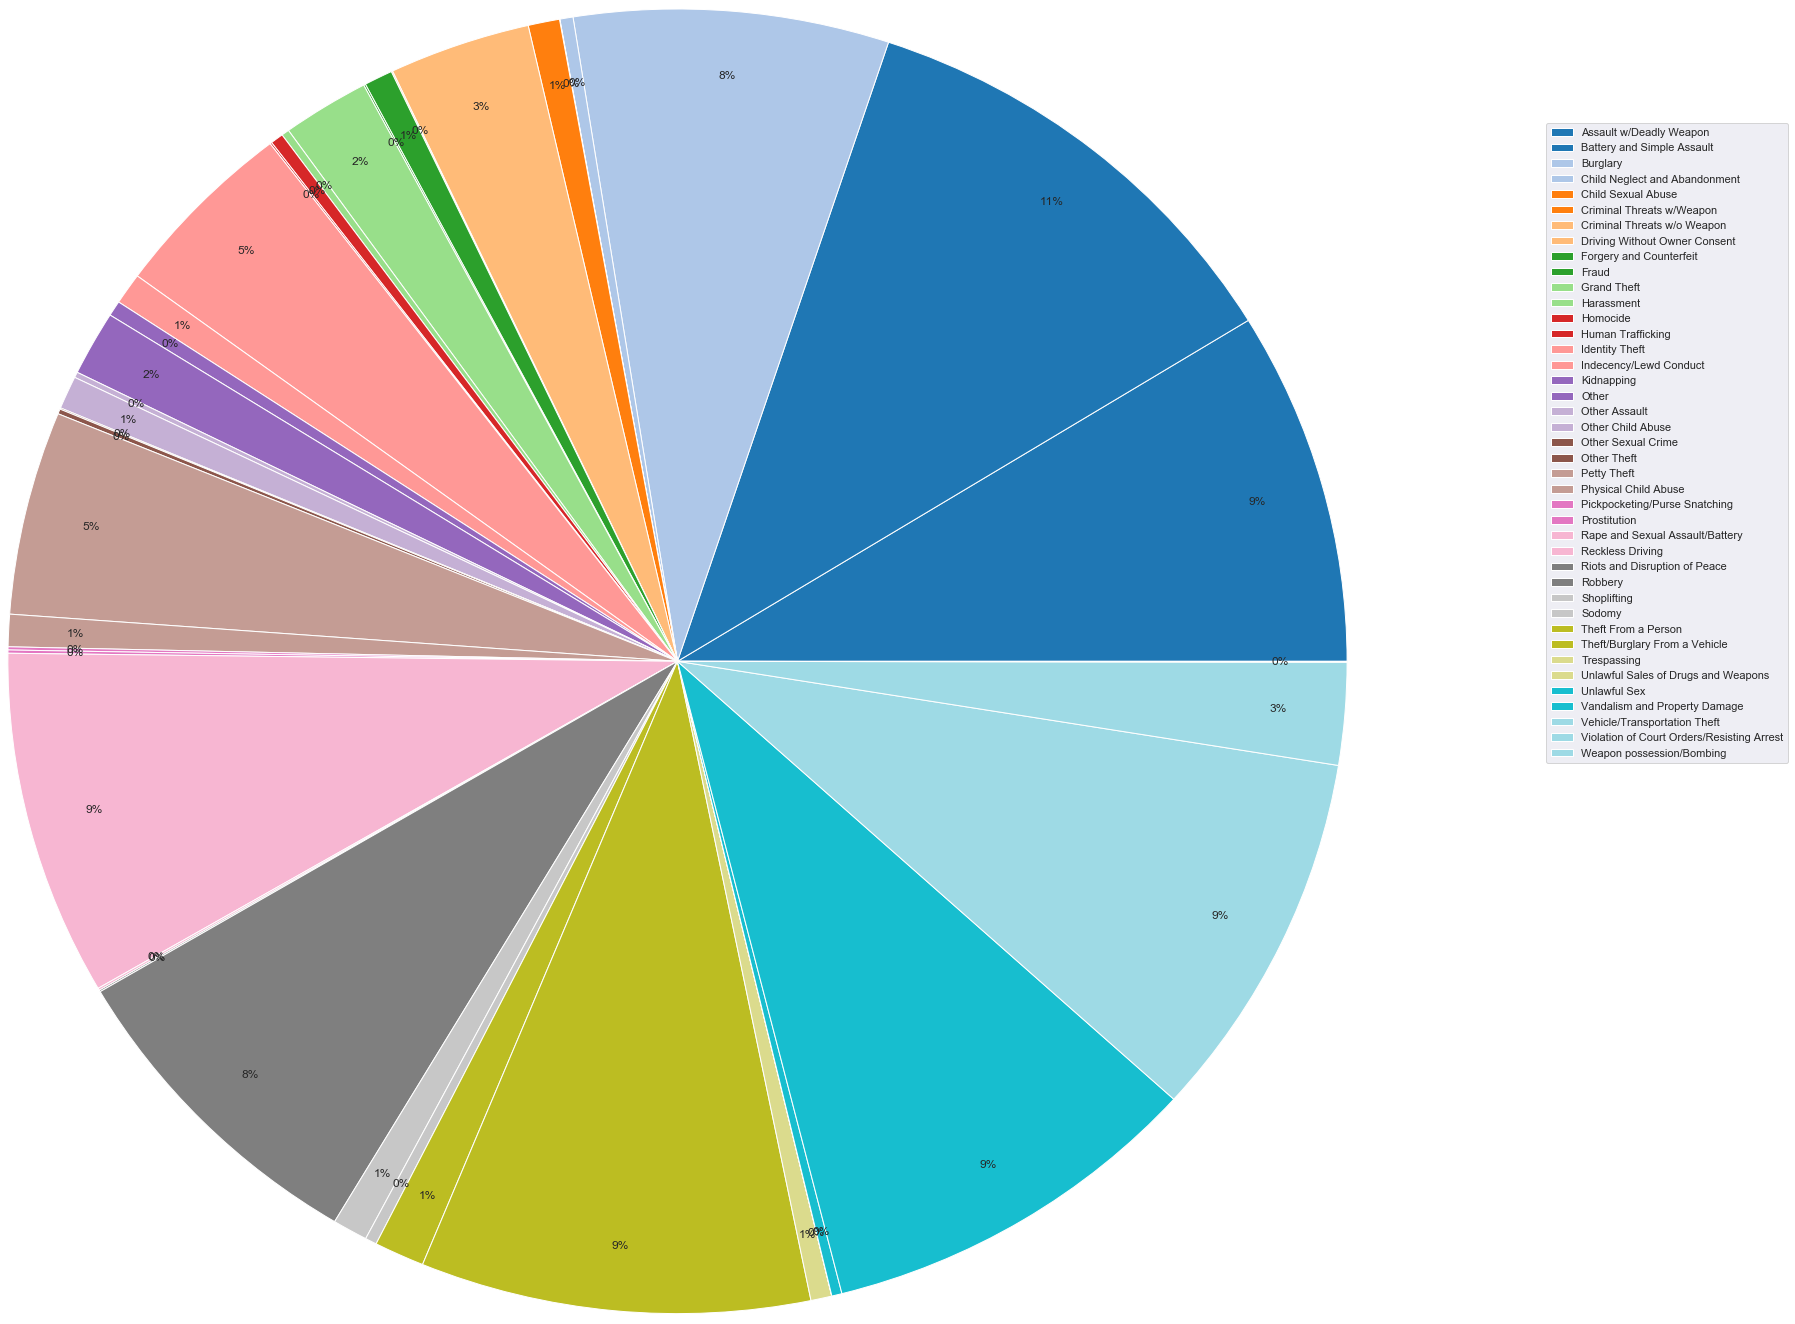

In [68]:
dcrime_77th=dcrime_by_district[(dcrime_by_district['Area Name']=='77th Street')]
dcrime_77th=dcrime_77th.groupby(['Crime_Detailed']).size().to_frame('Count')
dcrime_77th.plot.pie(y='Count',colormap='tab20',autopct='%1.0f%%',pctdistance=.90, radius=1.5,figsize=(20,20),labels=None)
plt.legend(bbox_to_anchor=(1.5,1),labels=dcrime_77th.index)

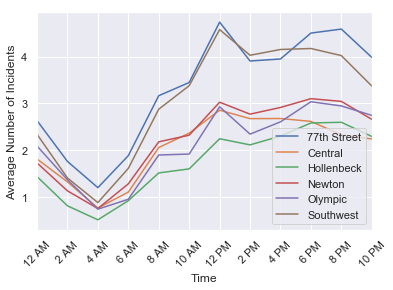

In [69]:
crime_time=df.loc[:,['Date Occurred_Time Occurred','Area Name','Crime Code Description']]
crime_time_rising=crime_time[(crime_time['Area Name']=='Central')| (crime_time['Area Name']=='Olympic')|(crime_time['Area Name']=='Newton') | (crime_time['Area Name']=='Hollenbeck')|(crime_time['Area Name']=='77th Street')|(crime_time['Area Name']=='Southwest')]
crime_time_rising.set_index(['Date Occurred_Time Occurred'],inplace=True)
crime_time_rising=crime_time_rising.groupby('Area Name')
crime_time_rising=crime_time_rising.resample('2H').count()
crime_time_rising.drop(columns='Area Name',inplace=True)
crime_time_rising.reset_index(inplace=True)
crime_time_rising['Time Occurred']=crime_time_rising['Date Occurred_Time Occurred'].dt.time
crime_time_rising.drop(columns='Date Occurred_Time Occurred',inplace=True)
crime_time_rising=crime_time_rising.groupby(['Time Occurred','Area Name'])['Crime Code Description'].mean().to_frame('Average')
crime_time_rising=crime_time_rising.unstack(level='Area Name')
crime_time_rising.plot()
ax=plt.gca() 
ax.set_xticks(crime_time_rising.index)
plt.xlim(crime_time_rising.index[0],crime_time_rising.index[-1])
ax.set_xticklabels(['12 AM','2 AM','4 AM','6 AM','8 AM','10 AM','12 PM','2 PM','4 PM','6 PM','8 PM','10 PM'],rotation=45)
plt.xlabel('Time')
plt.ylabel('Average Number of Incidents')
plt.legend(loc='lower right',labels=['77th Street','Central','Hollenbeck','Newton','Olympic','Southwest'])

H          622877
W          441442
B          287847
O          174304
Missing    166297
X           54197
A           42766
K            7999
F            2102
I             747
C             684
P             305
J             267
U             166
V             102
G              72
Z              66
S              28
D              18
L              11
-               2
Name: Victim Descent, dtype: int64


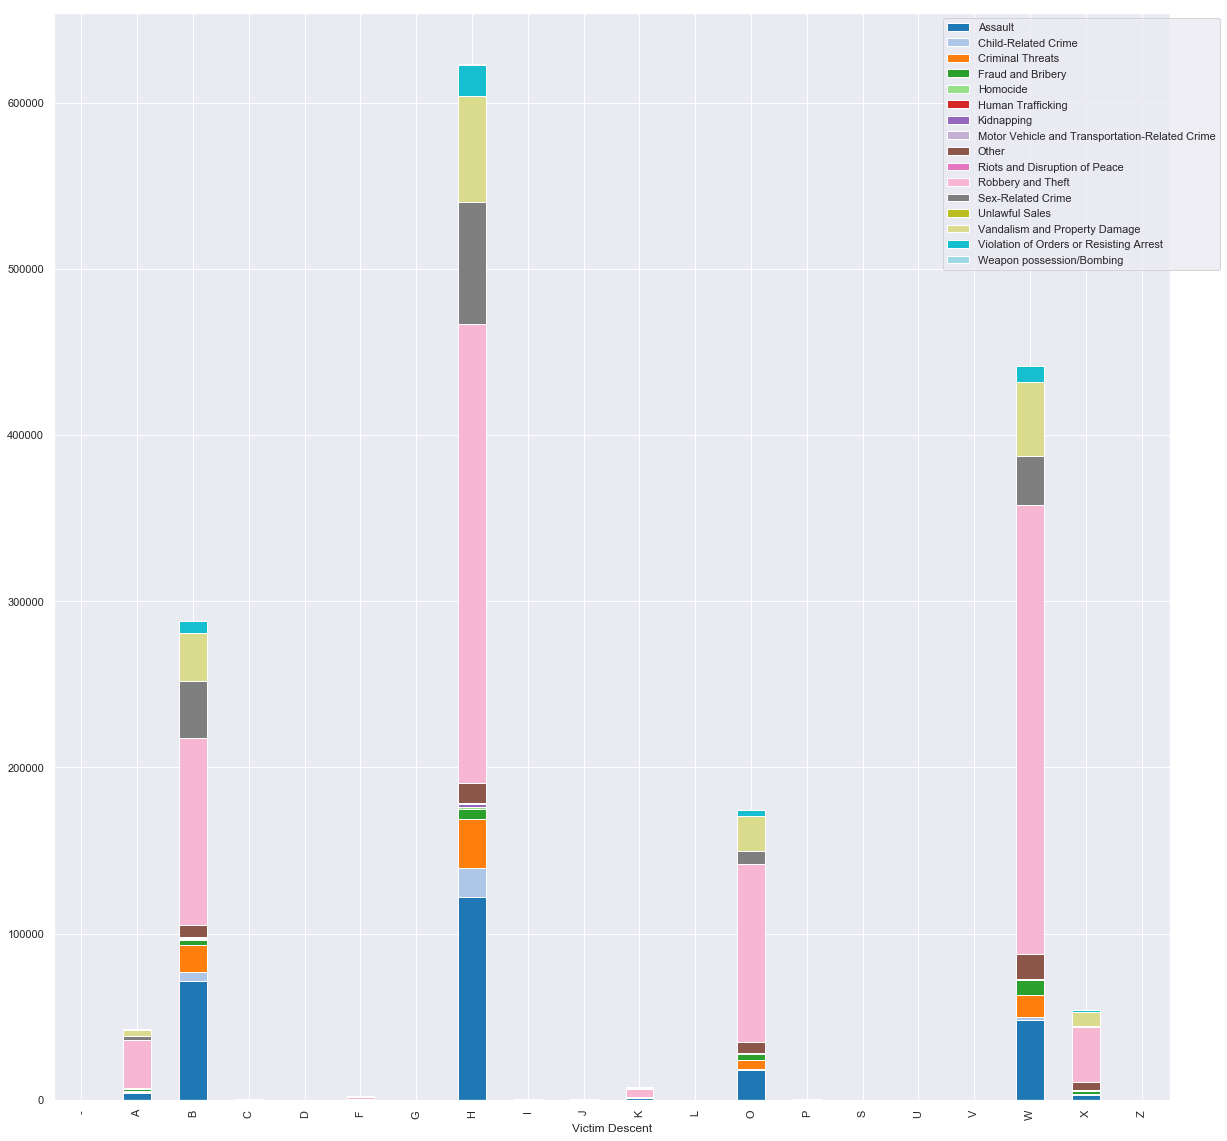

In [70]:
descent_crime=df.loc[:,['Victim Descent','Crime']]
print(descent_crime['Victim Descent'].value_counts())
descent_crime=descent_crime[descent_crime['Victim Descent']!='Missing']
descent_crime=descent_crime.groupby(['Victim Descent','Crime']).size().to_frame('Count')
descent_crime=descent_crime.unstack(level='Crime',fill_value=0)
descent_crime['Count'].plot(kind='bar',stacked=True,colormap='tab20',figsize=(20,20))
plt.legend(bbox_to_anchor=(1.05,1))

In [71]:
df_null=(df['Victim Age']=='Missing')|(df['Victim Sex']=='Missing') | (df['Victim Descent']=='Missing')
df_clean=df[~df_null]
df_clean.head()

Date Occurred_Time Occurred    Area Name  \
0          2013-03-11 18:00:00  77th Street   
4          2014-01-04 23:00:00      Topanga   
5          2013-01-08 14:00:00      Central   
9          2013-01-15 08:00:00     Van Nuys   
12         2013-02-13 12:00:00  77th Street   

                        Crime Code Description Victim Age Victim Sex  \
0            INTIMATE PARTNER - SIMPLE ASSAULT         30          F   
4     VANDALISM - MISDEAMEANOR ($399 OR UNDER)         84          M   
5                            CRIMINAL HOMICIDE         49          F   
9   EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)         27          F   
12          THEFT PLAIN - PETTY ($950 & UNDER)         42          M   

   Victim Descent     Premise Description Status Description  \
0               W     MULTI-UNIT DWELLING        Adult Other   
4               W  SINGLE FAMILY DWELLING        Invest Cont   
5               W  SINGLE FAMILY DWELLING       Adult Arrest   
9               O          OTHER BUSINESS        Invest Cont   
12              H             PARKING LOT        Invest Cont   

               Location  Date Occurred Time Occurred  Hour  Minute  \
0   (33.9829, -118.3338)    2013-03-11      18:00:00    18       0   
4   (34.2009, -118.6369)    2014-01-04      23:00:00    23       0   
5   (34.0591, -118.2412)    2013-01-08      14:00:00    14       0   
9   (34.2012, -118.4662)    2013-01-15      08:00:00     8       0   
12  (33.9651, -118.2783)    2013-02-13      12:00:00    12       0   

        Hour_sin      Hour_cos  Min_sin  Min_cos  Time Code  \
0  -1.000000e+00 -1.836970e-16      0.0      1.0    Evening   
4  -2.588190e-01  9.659258e-01      0.0      1.0      Night   
5  -5.000000e-01 -8.660254e-01      0.0      1.0  Afternoon   
9   8.660254e-01 -5.000000e-01      0.0      1.0    Morning   
12  1.224647e-16 -1.000000e+00      0.0      1.0    Morning   

                            Crime                   Crime_Detailed  
0               Sex-Related Crime  Rape and Sexual Assault/Battery  
4   Vandalism and Property Damage    Vandalism and Property Damage  
5                        Homocide                         Homocide  
9               Robbery and Theft                      Grand Theft  
12              Robbery and Theft                      Petty Theft

Text(0,0.5,'Crime Count')

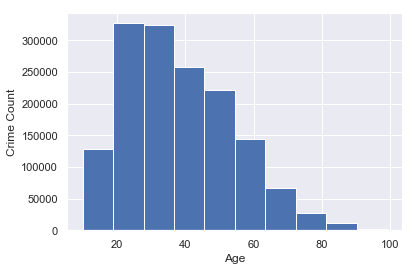

In [72]:
df_clean['Victim Age'].plot(kind='hist')
plt.xlabel('Age')
plt.ylabel('Crime Count')

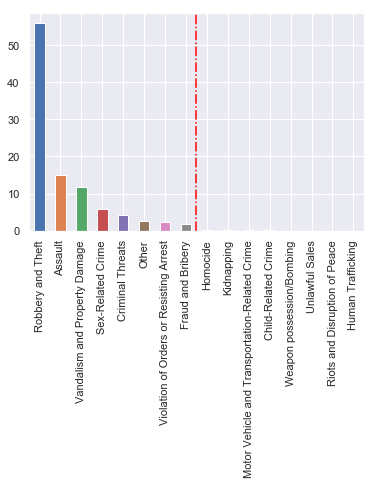

In [73]:
df_age_high=df_clean[df_clean['Victim Age']>40]
age_high_crime_count=((df_age_high['Crime'].value_counts()/(df_age_high['Crime'].value_counts().sum())))*100
age_high_crime_count.plot(kind='bar')
plt.axvline(7.5,color='red',linestyle='-.')

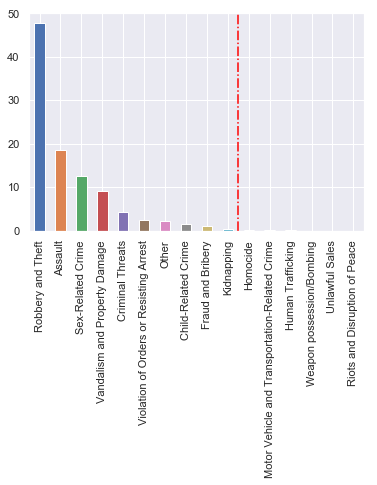

In [74]:
df_age_low=df_clean[df_clean['Victim Age']<40]
age_low_crime_count=((df_age_low['Crime'].value_counts()/(df_age_low['Crime'].value_counts().sum())))*100
age_low_crime_count.plot(kind='bar')
plt.axvline(9.5,color='red',linestyle='-.')

In [75]:
df_clean['Victim Sex'].value_counts()

M    753474
F    747712
X     11668
H        61
N         5
-         1
Name: Victim Sex, dtype: int64

Text(0,0.5,'Crime Count')

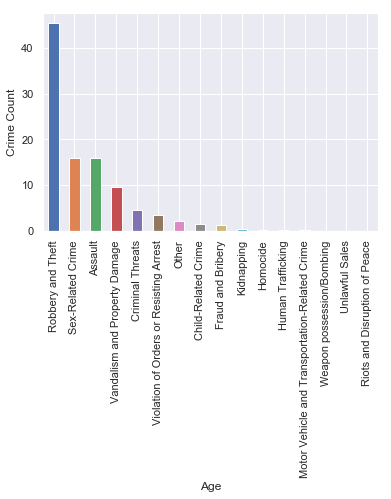

In [76]:
df_sex_female=df_clean[df_clean['Victim Sex']=='F']
((df_sex_female['Crime'].value_counts())/(df_sex_female['Crime'].value_counts().sum())*100).plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Crime Count')

Text(0,0.5,'Crime Count')

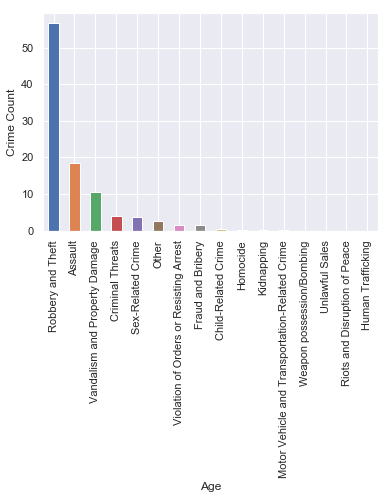

In [77]:
df_sex_male=df_clean[df_clean['Victim Sex']=='M']
((df_sex_male['Crime'].value_counts())/(df_sex_male['Crime'].value_counts().sum())*100).plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Crime Count')

Text(0,0.5,'Crime Count')

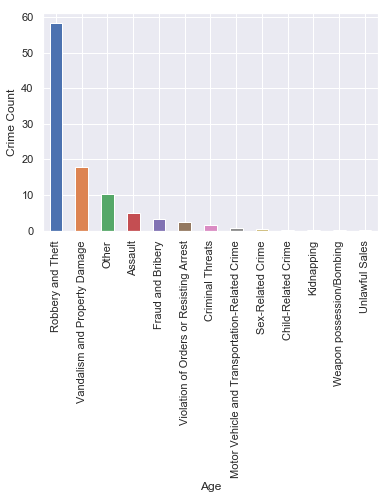

In [78]:
df_sex_x=df_clean[df_clean['Victim Sex']=='X']
count=(((df_sex_x['Crime'].value_counts())/(df_sex_x['Crime'].value_counts().sum())*100))
count.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Crime Count')

Text(0,0.5,'Crime Count')

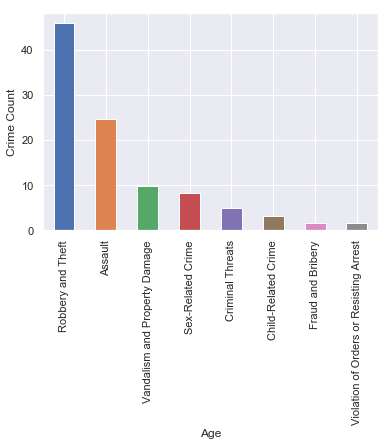

In [79]:
df_sex_h=df_clean[df_clean['Victim Sex']=='H']
((df_sex_h['Crime'].value_counts())/(df_sex_h['Crime'].value_counts().sum())*100).plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Crime Count')

In [81]:
df_clean.loc[:,'Location ']=df_clean.loc[:,'Location '].str.strip('(')
df_clean.loc[:,'Location ']=df_clean.loc[:,'Location '].str.strip(')')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [82]:
df_clean['Location ']=df_clean['Location '].str.split(',')
df_clean['Latitude']=df_clean['Location '].apply(lambda x: x[0])
df_clean['Longitude']=df_clean['Location '].apply(lambda x: x[1])
df_clean[['Latitude','Longitude']]=df_clean[['Latitude','Longitude']].astype(float)
df_clean=(df_clean[~(df_clean['Longitude']==0)| ~(df_clean['Latitude']==0)])
df_clean[['Victim Age','Victim Sex','Victim Descent','Premise Description']]=df_clean[['Victim Age','Victim Sex','Victim Descent','Premise Description']].apply(lambda x : x.astype('category'))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [97]:
from sklearn.multiclass import OneVsRestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV 

In [108]:
df_clean_full=df_clean[['Crime','Hour_sin','Hour_cos','Latitude','Longitude','Victim Age','Victim Sex','Victim Descent','Area Name']].copy()
df_clean_full=df_clean_full[(df_clean_full['Crime']=='Assault')|(df_clean_full['Crime']=='Robbery and Theft')]
df_clean_full_y=df_clean_full['Crime']
df_clean_full=pd.get_dummies(df_clean_full[['Hour_sin','Hour_cos','Latitude','Longitude','Victim Age','Victim Sex','Victim Descent']])

<BarContainer object of 4 artists>

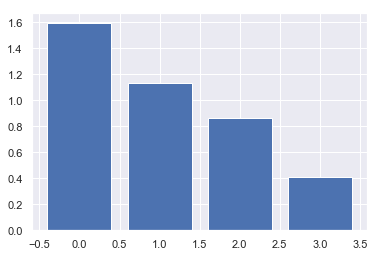

In [87]:
X_pca=df_clean[['Hour_sin','Hour_cos','Latitude','Longitude']].values
pca=PCA()
pipeline=make_pipeline(StandardScaler(),pca) 
pipeline.fit(X_pca)
plt.bar(range(pca.n_components_),pca.explained_variance_)

In [109]:
df_clean_full=pd.concat([df_clean_full_y,df_clean_full],axis=1)
df_clean_full

Crime      Hour_sin      Hour_cos  Latitude  Longitude  \
9        Robbery and Theft  8.660254e-01 -5.000000e-01   34.2012  -118.4662   
12       Robbery and Theft  1.224647e-16 -1.000000e+00   33.9651  -118.2783   
14       Robbery and Theft -8.660254e-01  5.000000e-01   34.2012  -118.4160   
16                 Assault -5.000000e-01 -8.660254e-01   34.0431  -118.2536   
18                 Assault -7.071068e-01 -7.071068e-01   34.0352  -118.2583   
19       Robbery and Theft -9.659258e-01 -2.588190e-01   34.0480  -118.2577   
23                 Assault -8.660254e-01  5.000000e-01   34.0517  -118.2456   
24                 Assault -2.588190e-01  9.659258e-01   34.0435  -118.2471   
27       Robbery and Theft -8.660254e-01 -5.000000e-01   34.0581  -118.2371   
28       Robbery and Theft -1.000000e+00 -1.836970e-16   34.0688  -118.2333   
33       Robbery and Theft  1.224647e-16 -1.000000e+00   34.0510  -118.2480   
38       Robbery and Theft -5.000000e-01  8.660254e-01   34.0451  -118.2604   
44                 Assault  5.000000e-01 -8.660254e-01   34.0458  -118.2430   
45                 Assault -7.071068e-01  7.071068e-01   34.0627  -118.2463   
46                 Assault -8.660254e-01  5.000000e-01   34.0412  -118.2474   
49       Robbery and Theft -2.588190e-01  9.659258e-01   34.0405  -118.2567   
50       Robbery and Theft -1.000000e+00 -1.836970e-16   34.0383  -118.2540   
51       Robbery and Theft  8.660254e-01 -5.000000e-01   34.0481  -118.2542   
53       Robbery and Theft -7.071068e-01 -7.071068e-01   34.0388  -118.2676   
54                 Assault -7.071068e-01  7.071068e-01   34.0415  -118.2654   
56                 Assault -9.659258e-01 -2.588190e-01   34.0363  -118.2573   
57                 Assault  7.071068e-01  7.071068e-01   34.0482  -118.2472   
58                 Assault -9.659258e-01 -2.588190e-01   34.0442  -118.2439   
59       Robbery and Theft -5.000000e-01 -8.660254e-01   34.0619  -118.2369   
60       Robbery and Theft -9.659258e-01  2.588190e-01   34.0401  -118.2533   
61       Robbery and Theft  2.588190e-01  9.659258e-01   34.0402  -118.2598   
63       Robbery and Theft -7.071068e-01 -7.071068e-01   34.0479  -118.2612   
66       Robbery and Theft -7.071068e-01  7.071068e-01   34.0650  -118.2418   
67                 Assault -7.071068e-01 -7.071068e-01   34.0381  -118.2629   
70                 Assault -7.071068e-01 -7.071068e-01   34.0381  -118.2629   
...                    ...           ...           ...       ...        ...   
1805493  Robbery and Theft  5.000000e-01 -8.660254e-01   34.1905  -118.6059   
1805494  Robbery and Theft  2.588190e-01  9.659258e-01   34.2200  -118.5885   
1805495  Robbery and Theft -9.659258e-01  2.588190e-01   34.2136  -118.5912   
1805497            Assault  2.588190e-01 -9.659258e-01   34.1673  -118.5946   
1805498  Robbery and Theft -2.588190e-01 -9.659258e-01   34.1888  -118.6059   
1805499  Robbery and Theft -9.659258e-01 -2.588190e-01   34.1668  -118.6058   
1805500  Robbery and Theft  2.588190e-01  9.659258e-01   34.1916  -118.6427   
1805502  Robbery and Theft -8.660254e-01 -5.000000e-01   34.1847  -118.5928   
1805508  Robbery and Theft -8.660254e-01  5.000000e-01   34.1883  -118.6274   
1805509  Robbery and Theft -7.071068e-01  7.071068e-01   34.1784  -118.6066   
1805510  Robbery and Theft  2.588190e-01 -9.659258e-01   34.1923  -118.6104   
1805511  Robbery and Theft -5.000000e-01 -8.660254e-01   34.1567  -118.6147   
1805512  Robbery and Theft  1.224647e-16 -1.000000e+00   34.1648  -118.5771   
1805513  Robbery and Theft -7.071068e-01 -7.071068e-01   34.2047  -118.5879   
1805514  Robbery and Theft -1.000000e+00 -1.836970e-16   34.1679  -118.5804   
1805515  Robbery and Theft -9.659258e-01 -2.588190e-01   34.1688  -118.6145   
1805516  Robbery and Theft -7.071068e-01  7.071068e-01   34.1875  -118.6030   
1805518  Robbery and Theft -9.659258e-01 -2.588190e-01   34.1531  -118.6194   
1805519  Robbery and Theft  1.224647e-16 -1.000000e+00   34.1865  -118.

In [110]:
X=df_clean[['Hour_sin','Hour_cos','Latitude','Longitude']].values
y=df_clean['Crime'].values
X_mod=df_clean_full.drop(columns='Crime').values
Y_mod=df_clean_full['Crime'].values 
print(X_mod.shape)
print(Y_mod.shape)


(1028227, 120)
(1028227,)


In [112]:
X_train,X_test,y_train,y_test = train_test_split(X_mod,Y_mod,test_size=.3, random_state=42)
ABC=AdaBoostClassifier()
param_grid={'n_estimators':[70,80,90,100]}
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')
grid_search_ABC.fit(X_train,y_train)
grid_search_ABC.best_params_

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'n_estimators': 100}

In [119]:
X_train,X_test,y_train,y_test = train_test_split(X_mod,Y_mod,test_size=.3, random_state=42)
pipe=make_pipeline(AdaBoostClassifier(n_estimators=100)) 
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.7520917823184826